## Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

## preprocs.

##### Exploring data

In [24]:
df=pd.read_csv('./COLD,FLU,ALLERGY,COVIDcsv.csv')

In [25]:
df

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [26]:
# # Create a new column that checks if 'PINK_EYE' and 'ITCHY_EYES' have the same value
# df['SAME_PINK_AND_ITCHY'] = df['PINK_EYE'] == df['ITCHY_EYES']




In [27]:
len(df)

44453

In [28]:
df.count()

COUGH                   44453
MUSCLE_ACHES            44453
TIREDNESS               44453
SORE_THROAT             44453
RUNNY_NOSE              44453
STUFFY_NOSE             44453
FEVER                   44453
NAUSEA                  44453
VOMITING                44453
DIARRHEA                44453
SHORTNESS_OF_BREATH     44453
DIFFICULTY_BREATHING    44453
LOSS_OF_TASTE           44453
LOSS_OF_SMELL           44453
ITCHY_NOSE              44453
ITCHY_EYES              44453
ITCHY_MOUTH             44453
ITCHY_INNER_EAR         44453
SNEEZING                44453
PINK_EYE                44453
TYPE                    44453
dtype: int64

In [29]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COUGH,44453.0,0.520662,0.499579,0.0,0.0,1.0,1.0,1.0
MUSCLE_ACHES,44453.0,0.519762,0.499615,0.0,0.0,1.0,1.0,1.0
TIREDNESS,44453.0,0.519897,0.499610,0.0,0.0,1.0,1.0,1.0
SORE_THROAT,44453.0,0.519358,0.499631,0.0,0.0,1.0,1.0,1.0
RUNNY_NOSE,44453.0,0.496232,0.499991,0.0,0.0,0.0,1.0,1.0
STUFFY_NOSE,44453.0,0.495850,0.499988,0.0,0.0,0.0,1.0,1.0
FEVER,44453.0,0.325400,0.468529,0.0,0.0,0.0,1.0,1.0
NAUSEA,44453.0,0.324253,0.468100,0.0,0.0,0.0,1.0,1.0
VOMITING,44453.0,0.324523,0.468201,0.0,0.0,0.0,1.0,1.0
DIARRHEA,44453.0,0.323465,0.467804,0.0,0.0,0.0,1.0,1.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [32]:
df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

##### missing and null values

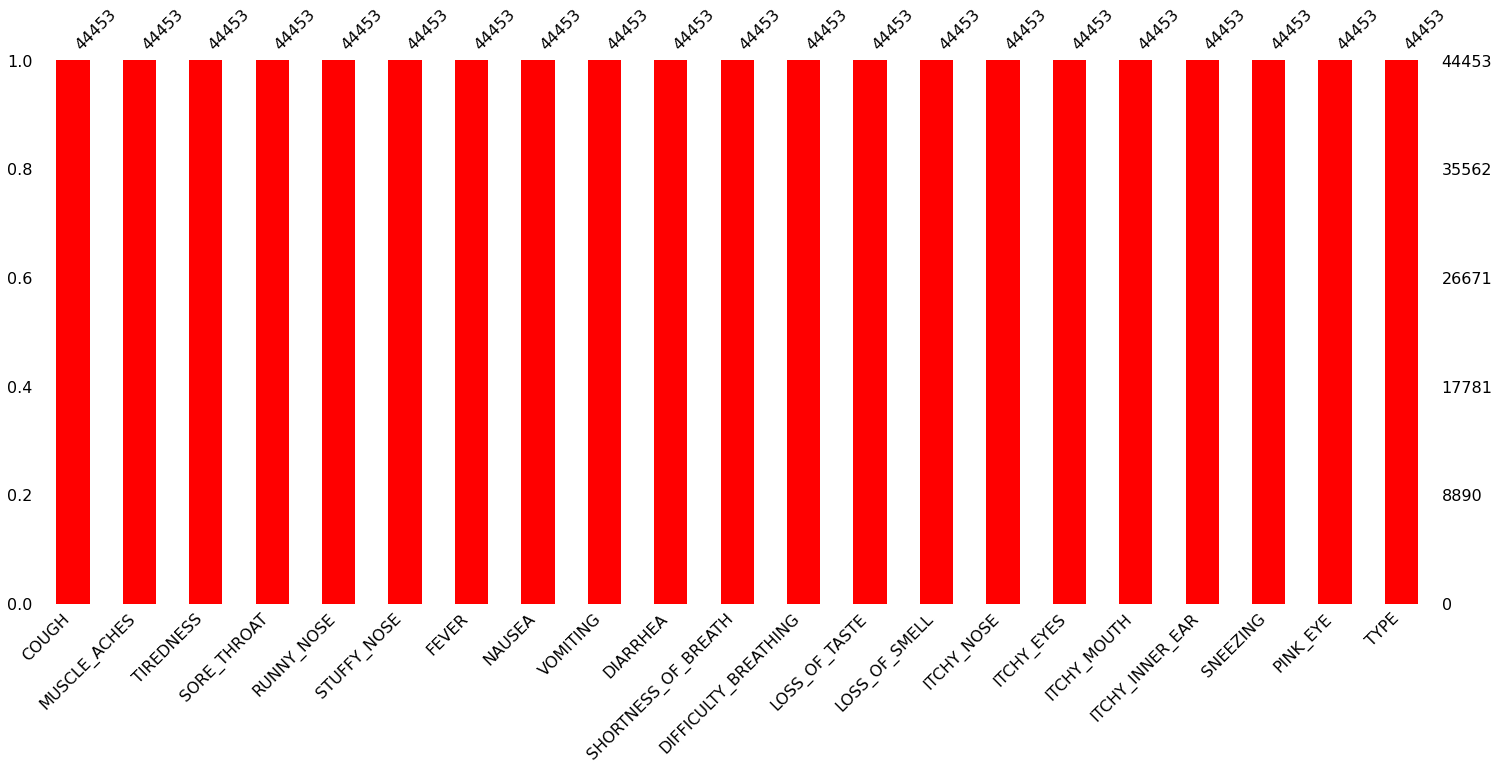

In [33]:
import missingno as msn
msn.bar(df,color="red");

In [34]:
df.isna()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
cols = df.columns
cols

for col in cols:
    print(col)
    print(df[col].isna().value_counts())
    print("")
    print("")

COUGH
False    44453
Name: COUGH, dtype: int64


MUSCLE_ACHES
False    44453
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
False    44453
Name: TIREDNESS, dtype: int64


SORE_THROAT
False    44453
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
False    44453
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
False    44453
Name: STUFFY_NOSE, dtype: int64


FEVER
False    44453
Name: FEVER, dtype: int64


NAUSEA
False    44453
Name: NAUSEA, dtype: int64


VOMITING
False    44453
Name: VOMITING, dtype: int64


DIARRHEA
False    44453
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
False    44453
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
False    44453
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
False    44453
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
False    44453
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
False    44453
Name: ITCHY_NOSE, dtype: int64


ITCHY_EYES
False    44453
Name: ITCHY_EYES, dtype: int64


ITCHY_MOUTH
False    44453
Name: ITC

##### counting features values

In [36]:
cols = df.columns
cols

for col in cols:
    print(col)
    print(df[col].value_counts())
    print("")
    print("")

COUGH
1    23145
0    21308
Name: COUGH, dtype: int64


MUSCLE_ACHES
1    23105
0    21348
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
1    23111
0    21342
Name: TIREDNESS, dtype: int64


SORE_THROAT
1    23087
0    21366
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
0    22394
1    22059
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
0    22411
1    22042
Name: STUFFY_NOSE, dtype: int64


FEVER
0    29988
1    14465
Name: FEVER, dtype: int64


NAUSEA
0    30039
1    14414
Name: NAUSEA, dtype: int64


VOMITING
0    30027
1    14426
Name: VOMITING, dtype: int64


DIARRHEA
0    30074
1    14379
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
0    30055
1    14398
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
0    30030
1    14423
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
0    25650
1    18803
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
0    25639
1    18814
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
0    36261
1     8192
Name: ITCHY_NOSE, dtype

##### duplicated

In [37]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44448    False
44449    False
44450    False
44451    False
44452    False
Length: 44453, dtype: bool

In [38]:
df.duplicated().value_counts()

False    44453
dtype: int64

##### plotting

In [39]:
# cols = df.columns
# for col in cols:
#     sns.jointplot(x=col, y='TYPE', data=df, kind='scatter', height=8, color='m')
#     plt.show()


In [40]:
# cols = df.columns
# for col in cols:
#     sns.countplot(x='TYPE', data=df, hue=col, palette='BuPu')
#     plt.show()
    

In [41]:
# cols = df.columns
# for col in cols:
#     sns.countplot(x=col, data=df,)
#     plt.show()

##### subplots

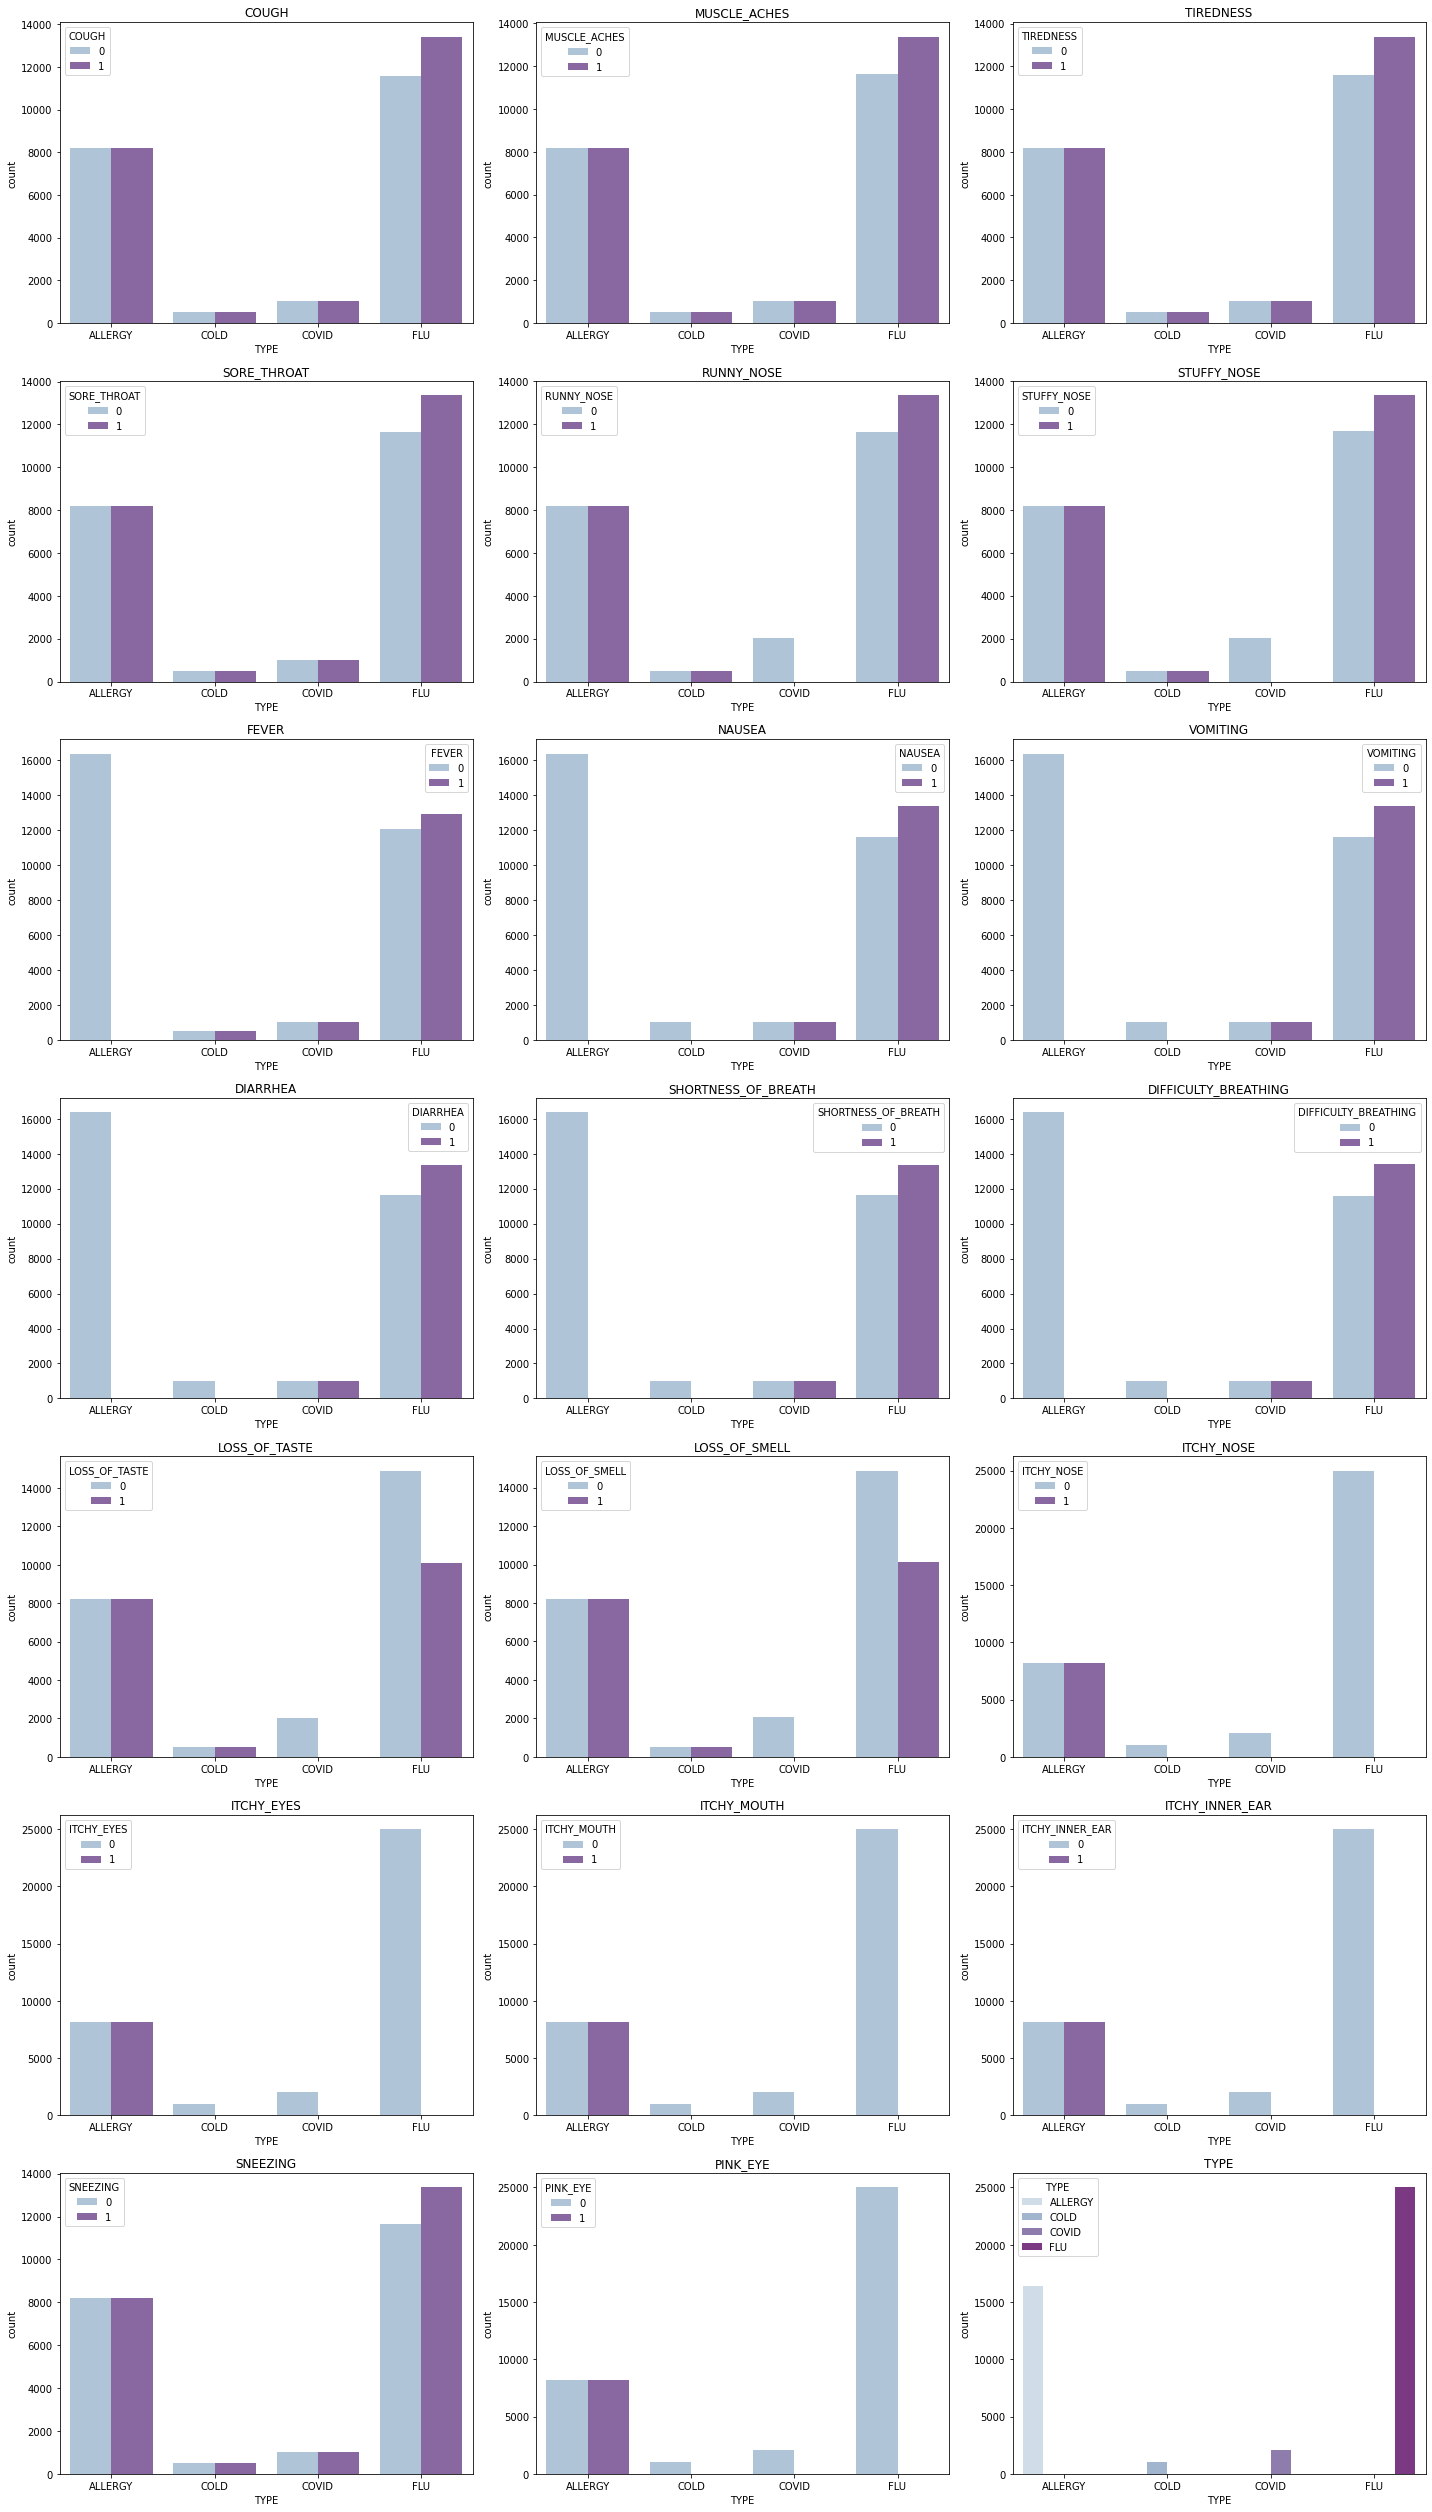

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cols = df.columns
num_cols = len(cols)

nrows = np.ceil(num_cols/3).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    # sns.countplot(x=col, data=df, ax=axes[i])
    sns.countplot(x='TYPE', data=df, hue=col, palette='BuPu',ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

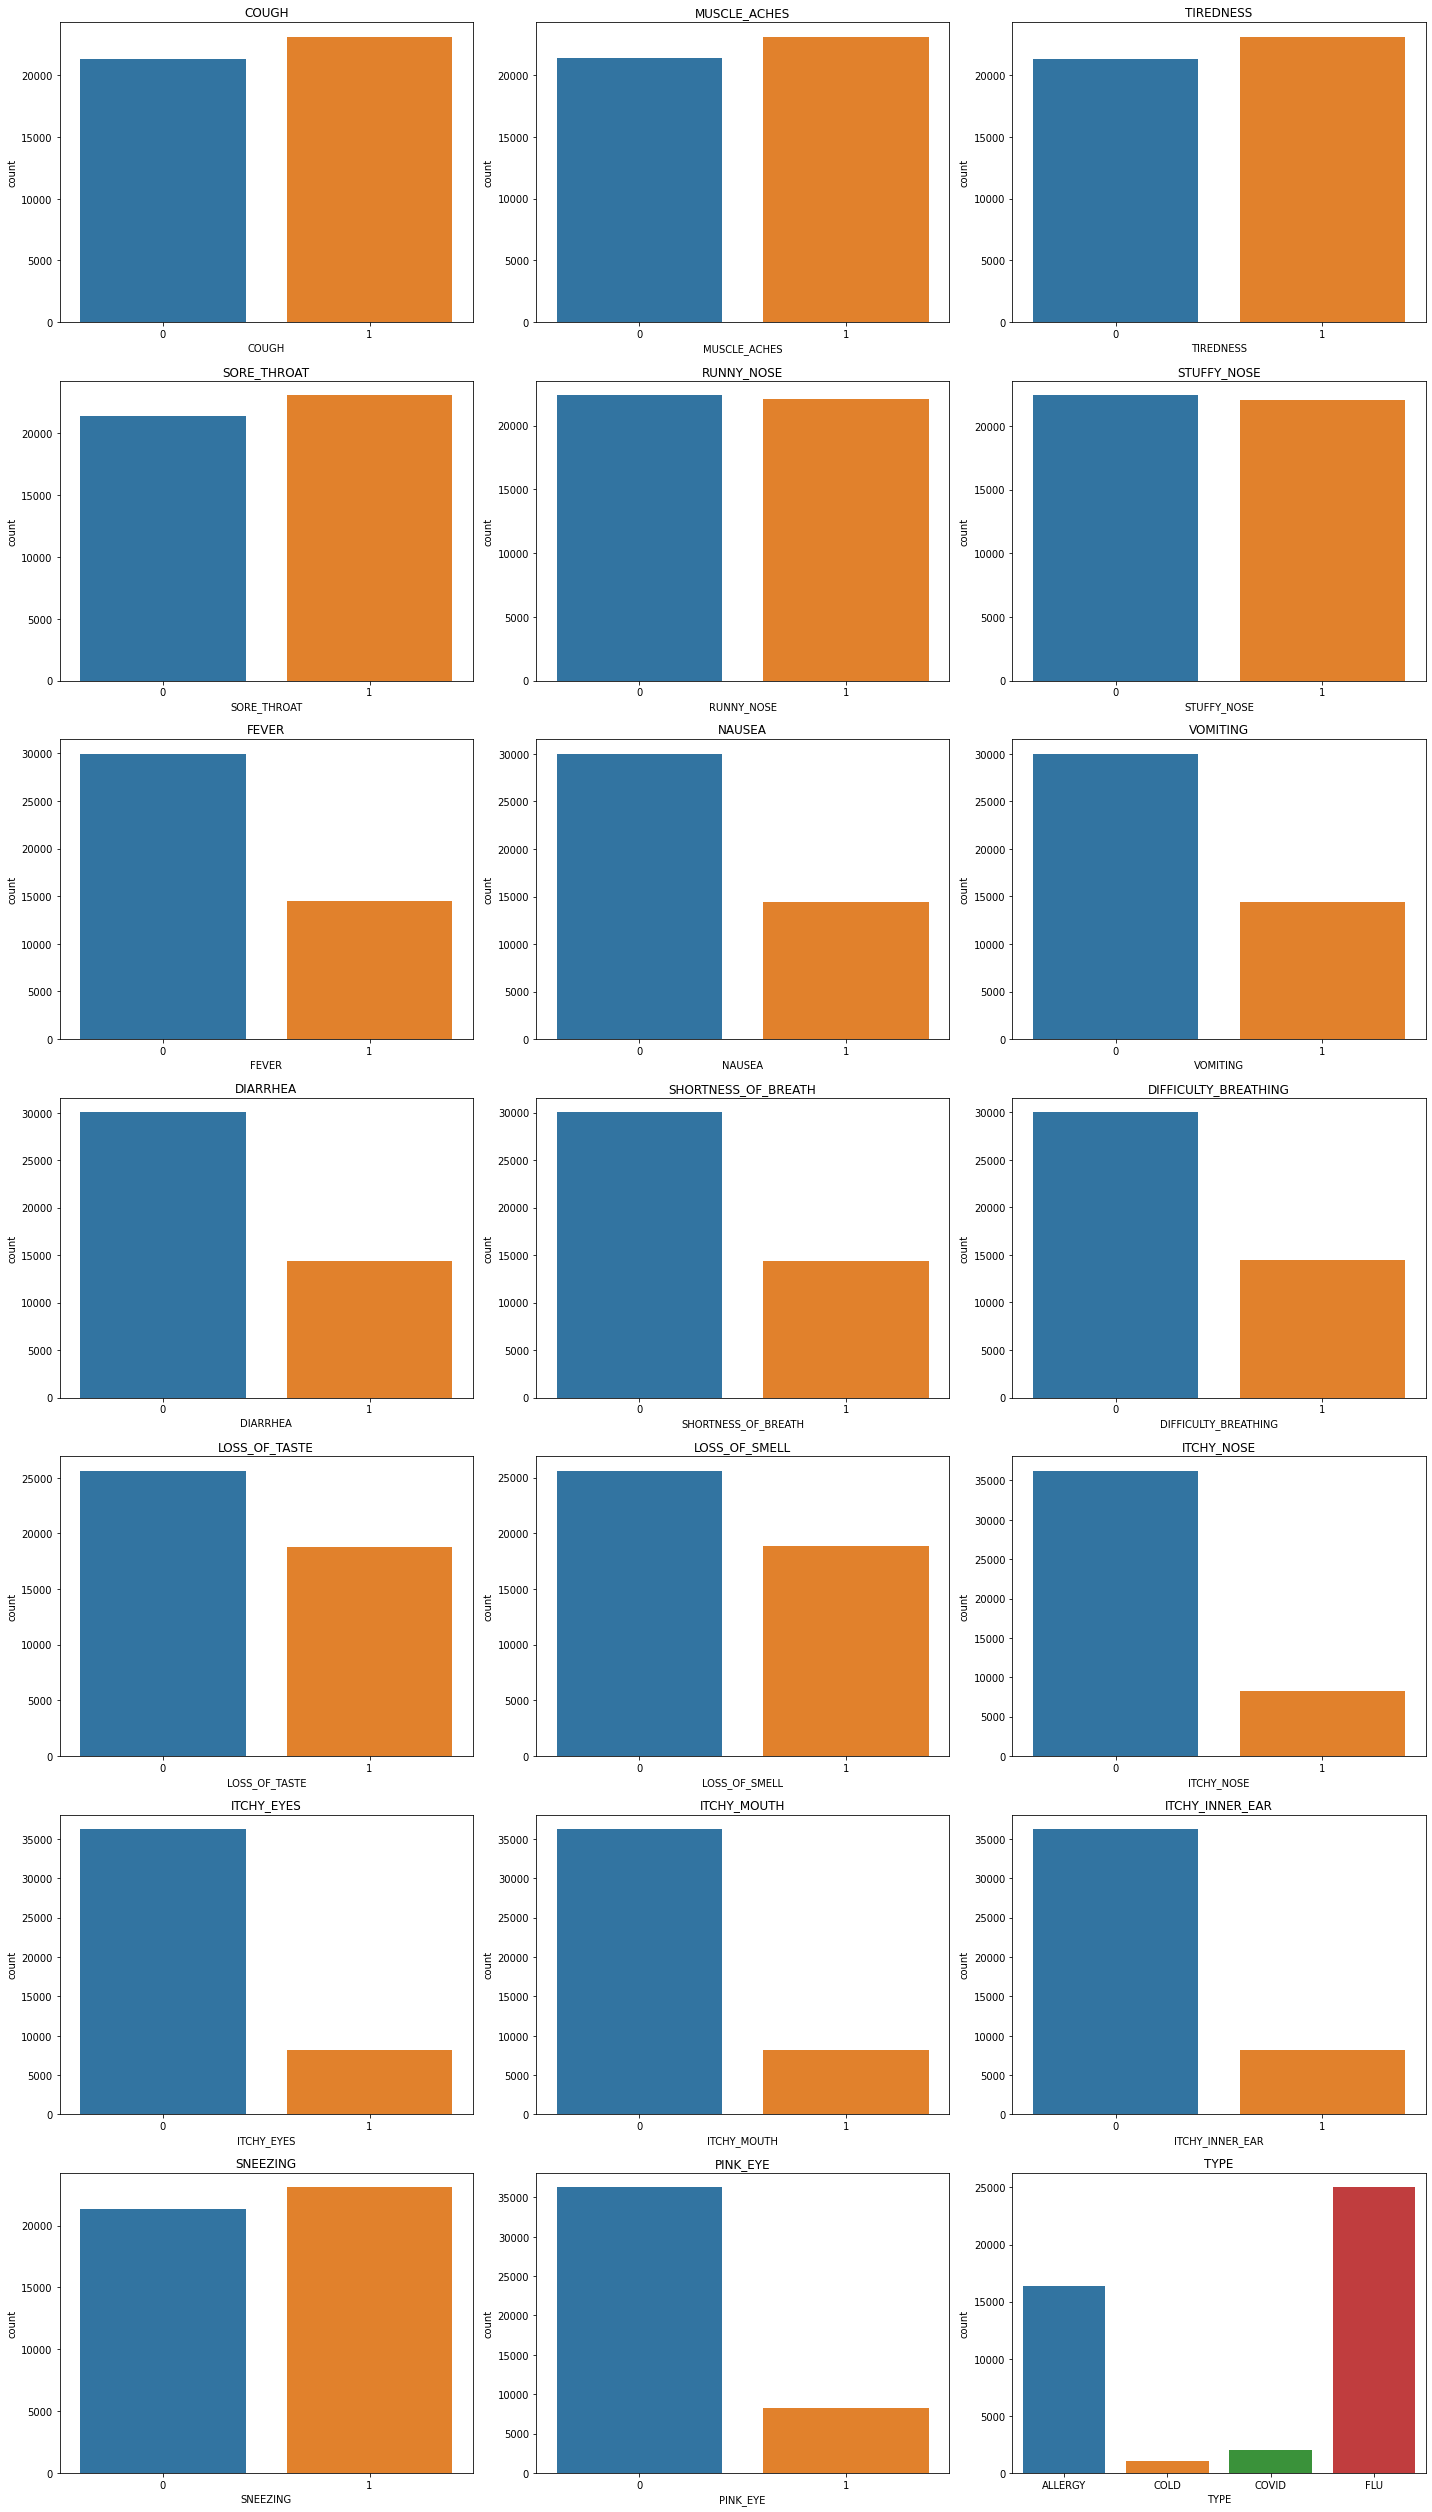

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cols = df.columns
num_cols = len(cols)
nrows = np.ceil(num_cols/3).astype(int)

fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

##### different plots

In [44]:
df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

In [45]:
# sns.jointplot(x='COUGH', y='MUSCLE_ACHES', data=df, kind='scatter', height=8, color='m')

In [46]:
# sns.jointplot(x='COUGH', y='MUSCLE_ACHES', data=df, kind='reg', height=8, color='m')

In [47]:
# sns.distplot(df['COUGH'], kde=False, bins=30, color='m')

In [48]:
# sns.jointplot(x='COUGH', y='TYPE', data=df, kind='scatter', height=8, color='m')

In [49]:
# sns.stripplot(x="TYPE", y="COUGH", data=df, palette="viridis")

In [50]:
# sns.distplot(df['COUGH'])

In [51]:
# sns.boxplot(x='TYPE', y='COUGH', data=df)

In [52]:
# df.hist(figsize=(20,15))

In [53]:
# g = sns.PairGrid(df)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

##### correlation map

In [54]:
df_corr = df.corr()
df_corr

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


<AxesSubplot:>

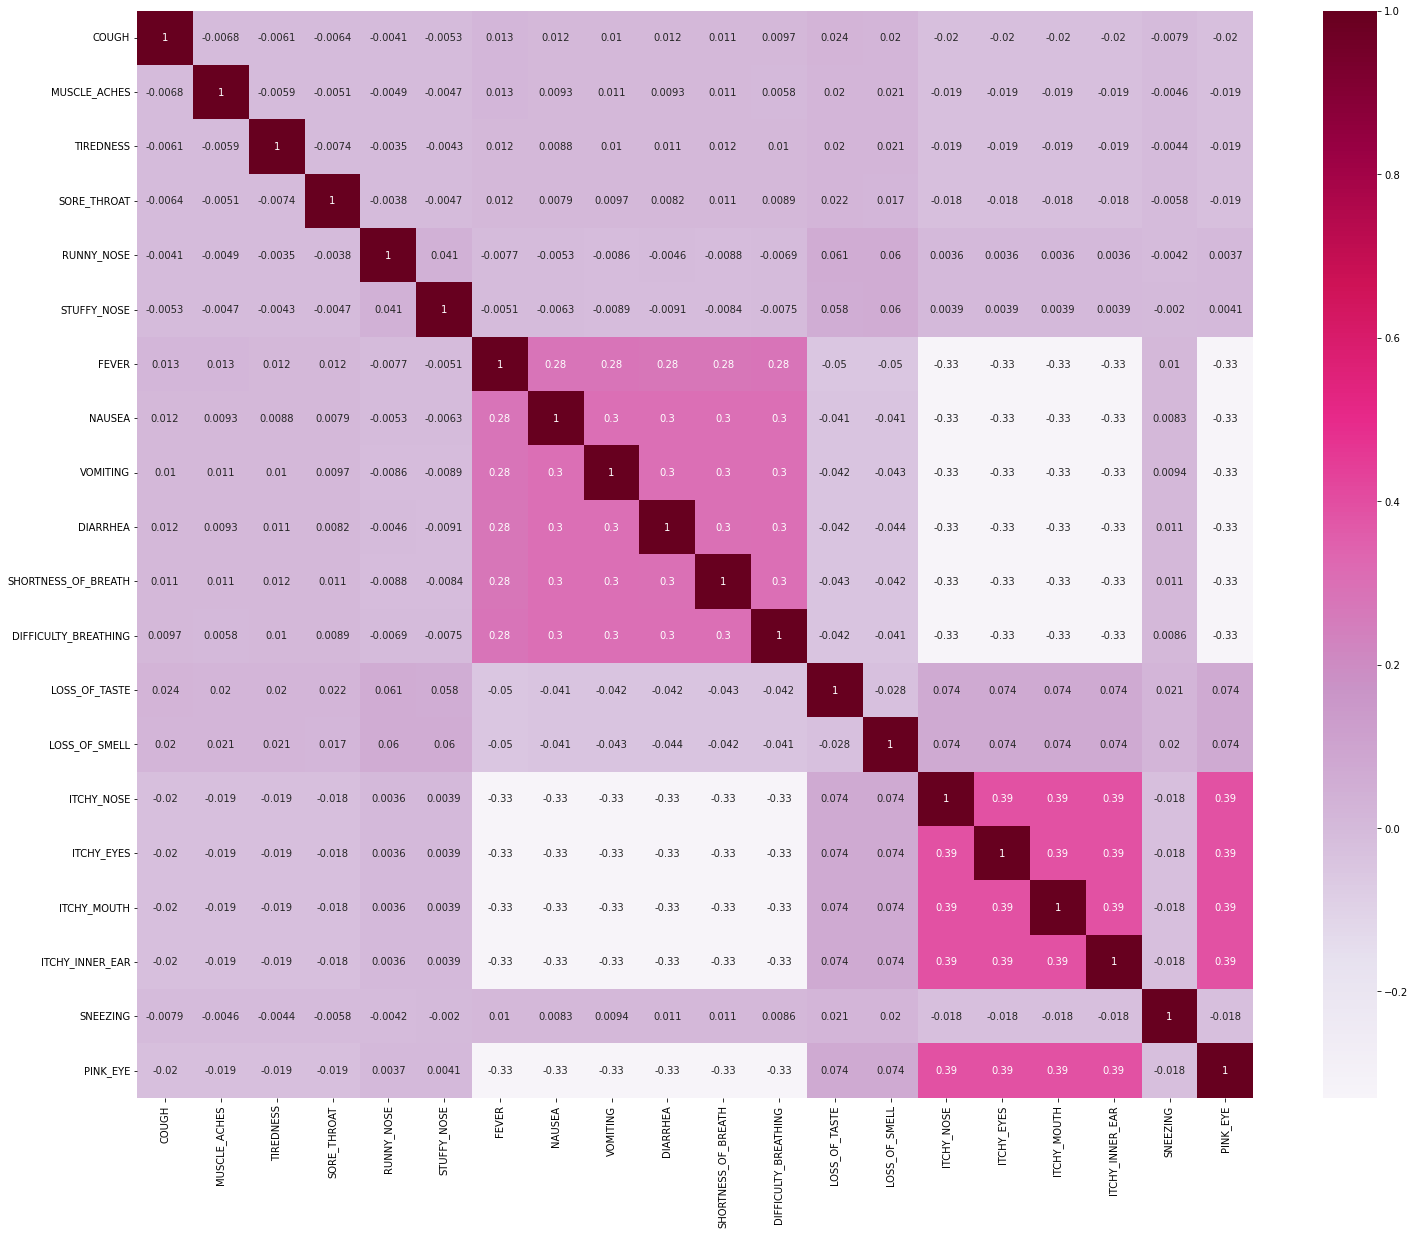

In [55]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="PuRd")

##### dropping correlated feature

In [56]:
# # Select upper triangle of correlation matrix
# upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
# # Find the index of features with a correlation greater than the threshold
# to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
# print(to_drop)

In [57]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
col_corr = corr_features = correlation(df, 0.8)
print(col_corr)

set()


### exploring data 2 `(TYPE is droped)`

##### exploring duplicated

In [58]:
df.duplicated().value_counts()

False    44453
dtype: int64

In [59]:
print(f'duplicated when TYPE is droped:')
df.drop(columns=['TYPE'], axis=1).duplicated().value_counts()

duplicated when TYPE is droped:


False    41489
True      2964
dtype: int64

##### dropping duplicatedd

In [60]:
df_noDplicate = df

In [61]:
cols_to_drop =df_noDplicate.iloc[:, :-1].columns
df_noDplicate = df_noDplicate.drop_duplicates(subset=cols_to_drop)
df_noDplicate

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44447,1,1,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


##### duplicated data

In [62]:
duplicate_data = df[df.duplicated(subset=cols_to_drop)]
duplicate_data

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
16383,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,COLD
16384,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,COLD
16387,1,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,COLD
16388,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,COLD
16390,0,1,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,COLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44398,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,FLU
44407,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,FLU
44414,0,1,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,FLU
44432,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,FLU


In [63]:
df_noDplicate.duplicated().value_counts()

False    41489
dtype: int64

The Training Accuracy for max_depth 1 is: 0.8652663682424123
The Validation Accuracy for max_depth 1 is: 0.8646849535177321

The Training Accuracy for max_depth 2 is: 0.9267548821880073
The Validation Accuracy for max_depth 2 is: 0.9260874555262252

The Training Accuracy for max_depth 3 is: 0.9267548821880073
The Validation Accuracy for max_depth 3 is: 0.9260874555262252

The Training Accuracy for max_depth 4 is: 0.9267548821880073
The Validation Accuracy for max_depth 4 is: 0.9260874555262252

The Training Accuracy for max_depth 5 is: 0.9267548821880073
The Validation Accuracy for max_depth 5 is: 0.9260874555262252

The Training Accuracy for max_depth 6 is: 0.9267548821880073
The Validation Accuracy for max_depth 6 is: 0.9260874555262252

The Training Accuracy for max_depth 7 is: 0.9363962811746765
The Validation Accuracy for max_depth 7 is: 0.9338918856880524

The Training Accuracy for max_depth 8 is: 0.938609867676718
The Validation Accuracy for max_depth 8 is: 0.9363020773556754

T

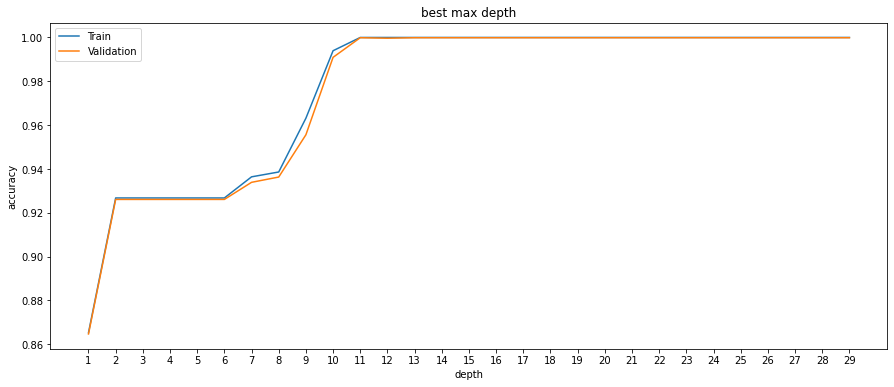

In [64]:
## Splitting
X = df_noDplicate.iloc[:, :-1]
y = df_noDplicate.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


### validation manually
train = []
val = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  
  score_train = model.score(X_train, y_train)
  score_val = model.score(X_val,y_val)

  train.append(score_train)
  val.append(score_val)

  print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  print('')

print(max(train))
print(max(val))
print(min(train))
print(min(val))
print('')

### plotting 
plt.figure(figsize = (15,6))
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,val,label='Validation')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()

## Splitting

In [65]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [66]:
X

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
44449,1,1,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0
44450,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
44451,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [67]:
y

0        ALLERGY
1        ALLERGY
2        ALLERGY
3        ALLERGY
4        ALLERGY
          ...   
44448        FLU
44449        FLU
44450        FLU
44451        FLU
44452        FLU
Name: TYPE, Length: 44453, dtype: object

In [68]:
from sklearn.model_selection import train_test_split

##### splitting train, test & validation

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

### validation manually

In [70]:
train = []
val = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  
  score_train = model.score(X_train, y_train)
  score_val = model.score(X_val,y_val)

  train.append(score_train)
  val.append(score_val)

  print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  print('')

The Training Accuracy for max_depth 1 is: 0.8617143381846564
The Validation Accuracy for max_depth 1 is: 0.8571122536418166

The Training Accuracy for max_depth 2 is: 0.9193333639410496
The Validation Accuracy for max_depth 2 is: 0.9148457583547558

The Training Accuracy for max_depth 3 is: 0.9193333639410496
The Validation Accuracy for max_depth 3 is: 0.9148457583547558

The Training Accuracy for max_depth 4 is: 0.9193333639410496
The Validation Accuracy for max_depth 4 is: 0.9148457583547558

The Training Accuracy for max_depth 5 is: 0.9193333639410496
The Validation Accuracy for max_depth 5 is: 0.9148457583547558

The Training Accuracy for max_depth 6 is: 0.9193333639410496
The Validation Accuracy for max_depth 6 is: 0.9148457583547558

The Training Accuracy for max_depth 7 is: 0.9193333639410496
The Validation Accuracy for max_depth 7 is: 0.9148457583547558

The Training Accuracy for max_depth 8 is: 0.9221339699738303
The Validation Accuracy for max_depth 8 is: 0.9167737789203085



In [71]:
print(max(train))
print(max(val))

0.9648317340801617
0.9258783204798628


In [72]:
print(min(train))
print(min(val))

0.8617143381846564
0.8571122536418166


##### ploting

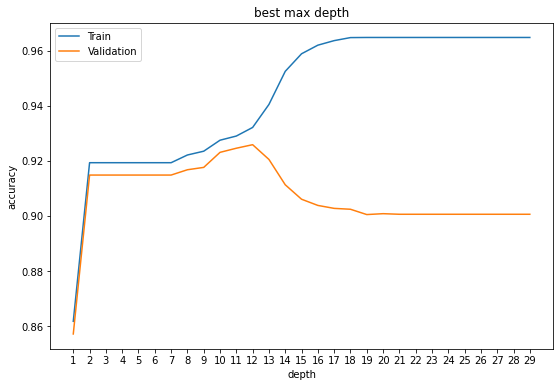

In [73]:
plt.figure(figsize=(9,6))
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,val,label='Validation')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()


##### building model

In [74]:
clf = RandomForestClassifier(max_depth=12)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)*100

93.27384523095381

##### evaluating model

In [75]:
clf.score(X_train, y_train)

0.9315917542812543

In [76]:
clf.score(X_val, y_val)

0.9253427592116538

### validation using gridSearch


##### splitting train & test

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from sklearn.model_selection import GridSearchCV

##### building models

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
param_grid = {
    'max_depth': np.arange(1,20),
    'n_estimators': np.arange(1,10),
    'criterion' : ["gini", "entropy", "log_loss"]
    # 'max_leaf_nodes': np.arange(1,51,5),
}
rf = RandomForestClassifier(random_state=42)

In [81]:
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, verbose=3, return_train_score=True, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 513 candidates, totalling 2565 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, verbose=3)

##### best params

In [82]:
print(f"Best Parameters: {grid_search_rf.best_params_} with best score {grid_search_rf.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 7} with best score 0.9275637230986964


##### predict and evalaute

In [83]:
# evalauting training data & the predicted data from training 
y_pred_test=grid_search_rf.predict(X_test)
accuracy_score(y_test,y_pred_test)*100

93.25134973005399

In [84]:
# evalauting test data & the predicted data from testing 
y_pred_train=grid_search_rf.predict(X_train)
accuracy_score(y_train,y_pred_train)*100

92.8752771796767

##### confusion matrix

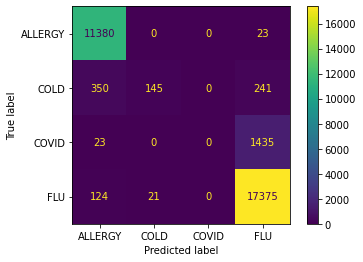

In [85]:
#  confusion matrix for train data & the predicted data from train
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_pred_train)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

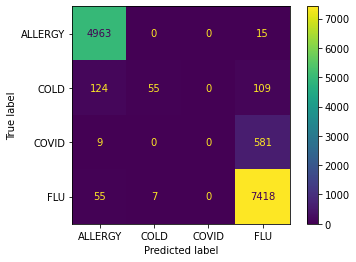

In [86]:
#  confusion matrix for test data & the predicted data from testing
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_test)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

##### classification report

In [87]:
# classification report for training data & the predicted data from training
print(classification_report(y_train,y_pred_train))

c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     ALLERGY       0.96      1.00      0.98     11403
        COLD       0.87      0.20      0.32       736
       COVID       0.00      0.00      0.00      1458
         FLU       0.91      0.99      0.95     17520

    accuracy                           0.93     31117
   macro avg       0.69      0.55      0.56     31117
weighted avg       0.88      0.93      0.90     31117



c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#  classification report for test data & the predicted data from testing 
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

     ALLERGY       0.96      1.00      0.98      4978
        COLD       0.89      0.19      0.31       288
       COVID       0.00      0.00      0.00       590
         FLU       0.91      0.99      0.95      7480

    accuracy                           0.93     13336
   macro avg       0.69      0.54      0.56     13336
weighted avg       0.89      0.93      0.91     13336



c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

##### `f1-score for covid is low so the covid will be dropped`

### New data `(covid is droped)`

##### dropping covid

In [89]:
df_noCovid = df[df['TYPE'] != 'COVID']

In [90]:
df_noCovid['TYPE'].value_counts()

FLU        25000
ALLERGY    16381
COLD        1024
Name: TYPE, dtype: int64

##### counting features values

In [91]:
cols = df_noCovid.columns
cols

for col in cols:
    print(col)
    print(df_noCovid[col].value_counts())
    print("")
    print("")

COUGH
1    22121
0    20284
Name: COUGH, dtype: int64


MUSCLE_ACHES
1    22081
0    20324
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
1    22087
0    20318
Name: TIREDNESS, dtype: int64


SORE_THROAT
1    22063
0    20342
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
1    22059
0    20346
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
1    22042
0    20363
Name: STUFFY_NOSE, dtype: int64


FEVER
0    28964
1    13441
Name: FEVER, dtype: int64


NAUSEA
0    29015
1    13390
Name: NAUSEA, dtype: int64


VOMITING
0    29003
1    13402
Name: VOMITING, dtype: int64


DIARRHEA
0    29050
1    13355
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
0    29031
1    13374
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
0    29006
1    13399
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
0    23602
1    18803
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
0    23591
1    18814
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
0    34213
1     8192
Name: ITCHY_NOSE, dtype

##### `=> no zeros and ones features => no features is dropped`

## Splitting

In [92]:
X = df_noCovid.iloc[:, :-1]
y = df_noCovid.iloc[:, -1]

In [93]:
X

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
44449,1,1,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0
44450,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
44451,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [94]:
y

0        ALLERGY
1        ALLERGY
2        ALLERGY
3        ALLERGY
4        ALLERGY
          ...   
44448        FLU
44449        FLU
44450        FLU
44451        FLU
44452        FLU
Name: TYPE, Length: 42405, dtype: object

##### splitting train, test & validation

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

### validation manually

In [97]:
train = []
val = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  
  score_train = model.score(X_train, y_train)
  score_val = model.score(X_val,y_val)

  train.append(score_train)
  val.append(score_val)

  print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  print('')

The Training Accuracy for max_depth 1 is: 0.9042256232553663
The Validation Accuracy for max_depth 1 is: 0.9001684446939922

The Training Accuracy for max_depth 2 is: 0.9642410241601694
The Validation Accuracy for max_depth 2 is: 0.960471645143178

The Training Accuracy for max_depth 3 is: 0.9642410241601694
The Validation Accuracy for max_depth 3 is: 0.960471645143178

The Training Accuracy for max_depth 4 is: 0.9642410241601694
The Validation Accuracy for max_depth 4 is: 0.960471645143178

The Training Accuracy for max_depth 5 is: 0.9642410241601694
The Validation Accuracy for max_depth 5 is: 0.960471645143178

The Training Accuracy for max_depth 6 is: 0.9642410241601694
The Validation Accuracy for max_depth 6 is: 0.960471645143178

The Training Accuracy for max_depth 7 is: 0.9642410241601694
The Validation Accuracy for max_depth 7 is: 0.960471645143178

The Training Accuracy for max_depth 8 is: 0.966214265088074
The Validation Accuracy for max_depth 8 is: 0.9629421673217293

The Tra

In [98]:
print(max(train))
print(max(val))

0.9876792761574743
0.9740595171252105


In [99]:
print(min(train))
print(min(val))

0.9042256232553663
0.9001684446939922


##### ploting

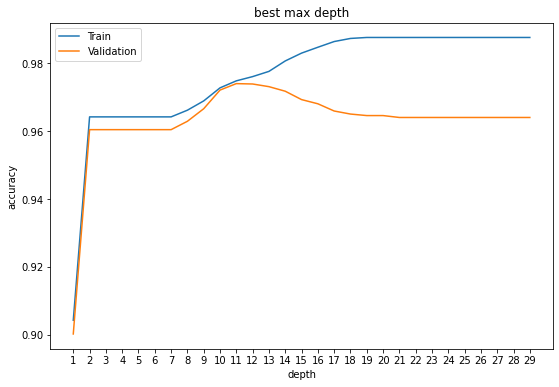

In [100]:
plt.figure(figsize=(9,6))
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,val,label='Validation')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()


##### building model

In [101]:
clf = RandomForestClassifier(max_depth=12)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)*100

97.68904260336426

##### evaluating model

In [102]:
clf.score(X_train, y_train)

0.9762729810376359

In [103]:
clf.score(X_val, y_val)

0.9746209994385177

### validation using gridSearch


##### splitting train & test

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
from sklearn.model_selection import GridSearchCV

##### building models

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
param_grid = {
    'max_depth': np.arange(1,20),
    'n_estimators': np.arange(1,10),
    'criterion' : ["gini", "entropy", "log_loss"]
    # 'max_leaf_nodes': np.arange(1,51,5),
}
rf = RandomForestClassifier(random_state=42)

In [108]:
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, verbose=3, return_train_score=True, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 513 candidates, totalling 2565 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, verbose=3)

##### best params

In [109]:
print(f"Best Parameters: {grid_search_rf.best_params_} with best score {grid_search_rf.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 5} with best score 0.9745309407811671


##### predict and evalaute

In [110]:
# evalauting training data & the predicted data from training 
y_pred_test=grid_search_rf.predict(X_test)
accuracy_score(y_test,y_pred_test)*100

97.61829900958968

In [111]:
# evalauting test data & the predicted data from testing 
y_pred_train=grid_search_rf.predict(X_train)
accuracy_score(y_train,y_pred_train)*100

97.51035946501364

##### confusion matrix

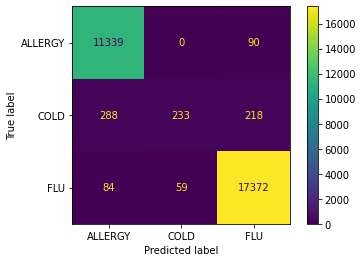

In [112]:
#  confusion matrix for train data & the predicted data from train
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_pred_train)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

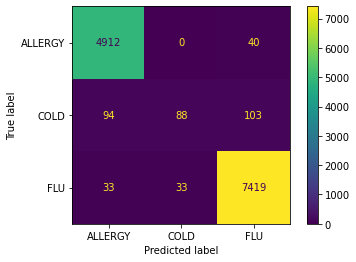

In [113]:
#  confusion matrix for test data & the predicted data from testing
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_test)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

##### classification report

In [114]:
# classification report for training data & the predicted data from training
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

     ALLERGY       0.97      0.99      0.98     11429
        COLD       0.80      0.32      0.45       739
         FLU       0.98      0.99      0.99     17515

    accuracy                           0.98     29683
   macro avg       0.92      0.77      0.81     29683
weighted avg       0.97      0.98      0.97     29683



In [115]:
#  classification report for test data & the predicted data from testing 
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

     ALLERGY       0.97      0.99      0.98      4952
        COLD       0.73      0.31      0.43       285
         FLU       0.98      0.99      0.99      7485

    accuracy                           0.98     12722
   macro avg       0.89      0.76      0.80     12722
weighted avg       0.97      0.98      0.97     12722



##### `=> undersampling flu and allergy => f1 score for cold increase`

##### before undersampling

In [116]:
df_noCovid['TYPE'].value_counts()

FLU        25000
ALLERGY    16381
COLD        1024
Name: TYPE, dtype: int64

<AxesSubplot:ylabel='TYPE'>

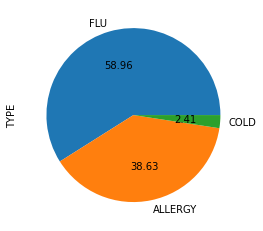

In [117]:
df_noCovid.TYPE.value_counts().plot.pie(autopct='%.2f')

##### after undersampling

In [118]:
from imblearn.under_sampling import RandomUnderSampler

In [119]:
rus = RandomUnderSampler(random_state=42, sampling_strategy={"FLU": 8000,
                                                              "ALLERGY":8000})
X, y = rus.fit_resample(X, y)


In [120]:
y.value_counts()

ALLERGY    8000
FLU        8000
COLD       1024
Name: TYPE, dtype: int64

Text(0.5, 1.0, 'under-sampling')

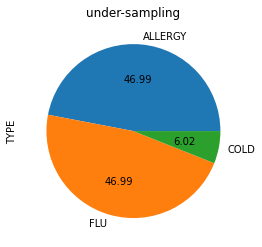

In [121]:
ax = y.value_counts().plot.pie(autopct='%.2f')
ax.set_title("under-sampling")

## Splitting

In [122]:
X

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
17020,1,1,1,0,0,1,1,0,1,1,0,1,1,1,0,0,0,0,1,0
17021,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0
17022,0,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0


In [123]:
y

0        ALLERGY
1        ALLERGY
2        ALLERGY
3        ALLERGY
4        ALLERGY
          ...   
17019        FLU
17020        FLU
17021        FLU
17022        FLU
17023        FLU
Name: TYPE, Length: 17024, dtype: object

##### splitting train, test & validation

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

(5108,)

In [147]:
test = X_test
test['TYPE'] = y_test

In [149]:
test.reset_index(drop=True, inplace=True)

In [150]:
test

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,FLU
1,1,0,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,ALLERGY
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,ALLERGY
3,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,ALLERGY
5104,0,0,0,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,FLU
5105,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,COLD
5106,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [134]:
test.to_csv('cold_test.csv')

### validation manually

In [ ]:
train = []
val = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  
  score_train = model.score(X_train, y_train)
  score_val = model.score(X_val,y_val)

  train.append(score_train)
  val.append(score_val)

  print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  print('')

The Training Accuracy for max_depth 1 is: 0.9158374295648004
The Validation Accuracy for max_depth 1 is: 0.9093706293706294

The Training Accuracy for max_depth 2 is: 0.933101546577149
The Validation Accuracy for max_depth 2 is: 0.9283916083916084

The Training Accuracy for max_depth 3 is: 0.9335811053830476
The Validation Accuracy for max_depth 3 is: 0.928951048951049

The Training Accuracy for max_depth 4 is: 0.9382568037405586
The Validation Accuracy for max_depth 4 is: 0.9348251748251748

The Training Accuracy for max_depth 5 is: 0.9382568037405586
The Validation Accuracy for max_depth 5 is: 0.9348251748251748

The Training Accuracy for max_depth 6 is: 0.9579187147824002
The Validation Accuracy for max_depth 6 is: 0.9541258741258741

The Training Accuracy for max_depth 7 is: 0.9613955161251648
The Validation Accuracy for max_depth 7 is: 0.9605594405594405

The Training Accuracy for max_depth 8 is: 0.9613955161251648
The Validation Accuracy for max_depth 8 is: 0.9605594405594405

Th

In [ ]:
print(max(train))
print(max(val))

0.9886104783599089
0.9748251748251748


In [ ]:
print(min(train))
print(min(val))

0.9158374295648004
0.9093706293706294


##### ploting

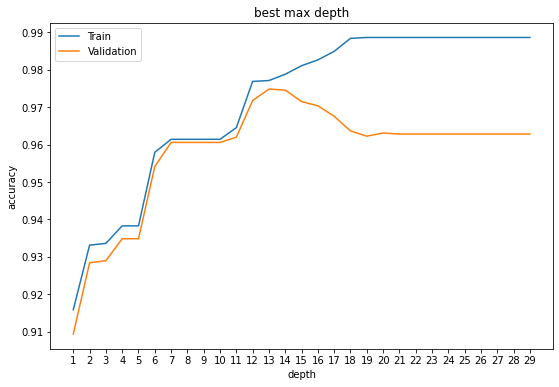

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,val,label='Validation')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()


##### building model

In [ ]:
clf = RandomForestClassifier(max_depth=12)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)*100

97.23962411902897

##### evaluating model

In [ ]:
clf.score(X_train, y_train)

0.975782280302122

In [ ]:
clf.score(X_val, y_val)

0.9748251748251748

### validation using gridSearch


##### splitting train & test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

##### building models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': np.arange(1,20),
    'n_estimators': np.arange(1,10),
    'criterion' : ["gini", "entropy", "log_loss"]
    # 'max_leaf_nodes': np.arange(1,51,5),
}
rf = RandomForestClassifier(random_state=42)

In [ ]:
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, verbose=3, return_train_score=True, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 513 candidates, totalling 2565 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, verbose=3)

##### best params

In [ ]:
print(f"Best Parameters: {grid_search_rf.best_params_} with best score {grid_search_rf.best_score_}")
# Best Parameters: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 8} with best score 0.972642099941701


Best Parameters: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 8} with best score 0.972642099941701


##### predict and evalaute

In [ ]:
# evalauting training data & the predicted data from training 
y_pred_test=grid_search_rf.predict(X_test)
accuracy_score(y_test,y_pred_test)*100

95.84964761158966

In [ ]:
# evalauting test data & the predicted data from testing 
y_pred_train=grid_search_rf.predict(X_train)
accuracy_score(y_train,y_pred_train)*100

96.64316884860692

##### confusion matrix

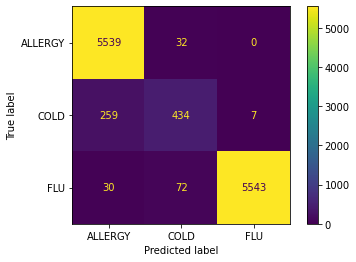

In [ ]:
#  confusion matrix for train data & the predicted data from train
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_pred_train)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

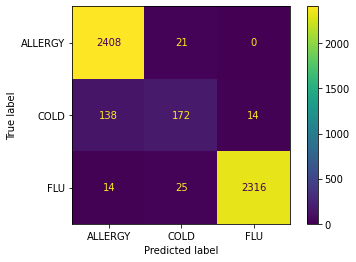

In [ ]:
#  confusion matrix for test data & the predicted data from testing
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_test)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

##### classification report

In [ ]:
# classification report for training data & the predicted data from training
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

     ALLERGY       0.95      0.99      0.97      5571
        COLD       0.81      0.62      0.70       700
         FLU       1.00      0.98      0.99      5645

    accuracy                           0.97     11916
   macro avg       0.92      0.87      0.89     11916
weighted avg       0.96      0.97      0.96     11916



In [ ]:
#  classification report for test data & the predicted data from testing 
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

     ALLERGY       0.94      0.99      0.97      2429
        COLD       0.79      0.53      0.63       324
         FLU       0.99      0.98      0.99      2355

    accuracy                           0.96      5108
   macro avg       0.91      0.84      0.86      5108
weighted avg       0.96      0.96      0.96      5108



### Kfold

In [ ]:
# from sklearn.model_selection import KFold

In [ ]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

In [ ]:
# k=10
# kf = KFold(n_splits=k, random_state=None)
# model = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=42)

# for train_index , test_index in kf.split(X):
#     print(train_index)
#     print(test_index)
#     print("")
#     print("")


# # test = 0
# # for i, val in enumerate(kf.split(X)):
# #     print(i)

# #     if(i==0):
# #         test = val
# #         print(val)



# # for i1, i2 in zip(range(10), np.arange(10,21)):
# #     print(i1)
# #     print(i2)
# #     print("")

In [ ]:
# pd.DataFrame(test)

In [ ]:
# k=5
# kf = KFold(n_splits=k, random_state=None)
# model = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=42)
# acc_score = []
# X_train2 = 0
# X_test2 = 0
# y_train2 = 0
# y_test2 = 0

 
# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
    
    
#     model.fit(X_train,y_train)
#     pred_values = model.predict(X_test)
     
#     acc = accuracy_score(pred_values , y_test)
#     acc_score.append(acc)
    
    
#     if(acc >= max(acc_score)):
#         X_train2 = X_train 
#         X_test2 = X_test
#         y_train2 = y_train
#         y_test2 = y_test
               
        

    

# avg_acc_score = sum(acc_score)/k
# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))
# print('max accuracy : {}'.format(max(acc_score)))


In [ ]:
# model = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=42)
# model.fit(X_train2,y_train2)
# pred_values = model.predict(X_test2)
# accuracy_score(pred_values , y_test2)
# # 0.9827896512935883



In [ ]:
# X_train = X_train2 
# X_test = X_test2
# y_train = y_train2
# y_test = y_test2

In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

### Building different models

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': np.arange(1,20),
    'n_estimators': np.arange(1,10),
    'criterion' : ["gini", "entropy", "log_loss"]
    # 'max_leaf_nodes': np.arange(1,51,5),
}
rf = RandomForestClassifier(random_state=42)

In [ ]:
grid_search_rf = GridSearchCV(rf,param_grid,
                                 cv=5, 
                                 verbose=3, 
                                 return_train_score=True)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 513 candidates, totalling 2565 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.706, test=0.716) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.708, test=0.707) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.706, test=0.715) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.715, test=0.714) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.718, test=0.705) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=2;, score=(train=0.721, test=0.716) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=2;, score=(train=0.717, test=0.729) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=2;, score=(train=0.722, test=0.709) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=2

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, verbose=3)

##### plotting

In [ ]:
result = pd.DataFrame(grid_search_rf.cv_results_) 
result_score = result['mean_test_score']*100

In [ ]:
result_param1 = list(result['param_criterion'].replace({"gini":40, "entropy":50, "log_loss":60}))
# result_param1 = list(result['param_criterion'].replace({"gini":0.1, "entropy":0.2, "log_loss":0.3}))
# result_param1 = list(result['param_criterion'])

result_param2 = list(result['param_max_depth'])


result_param3 = list(result['param_n_estimators'])

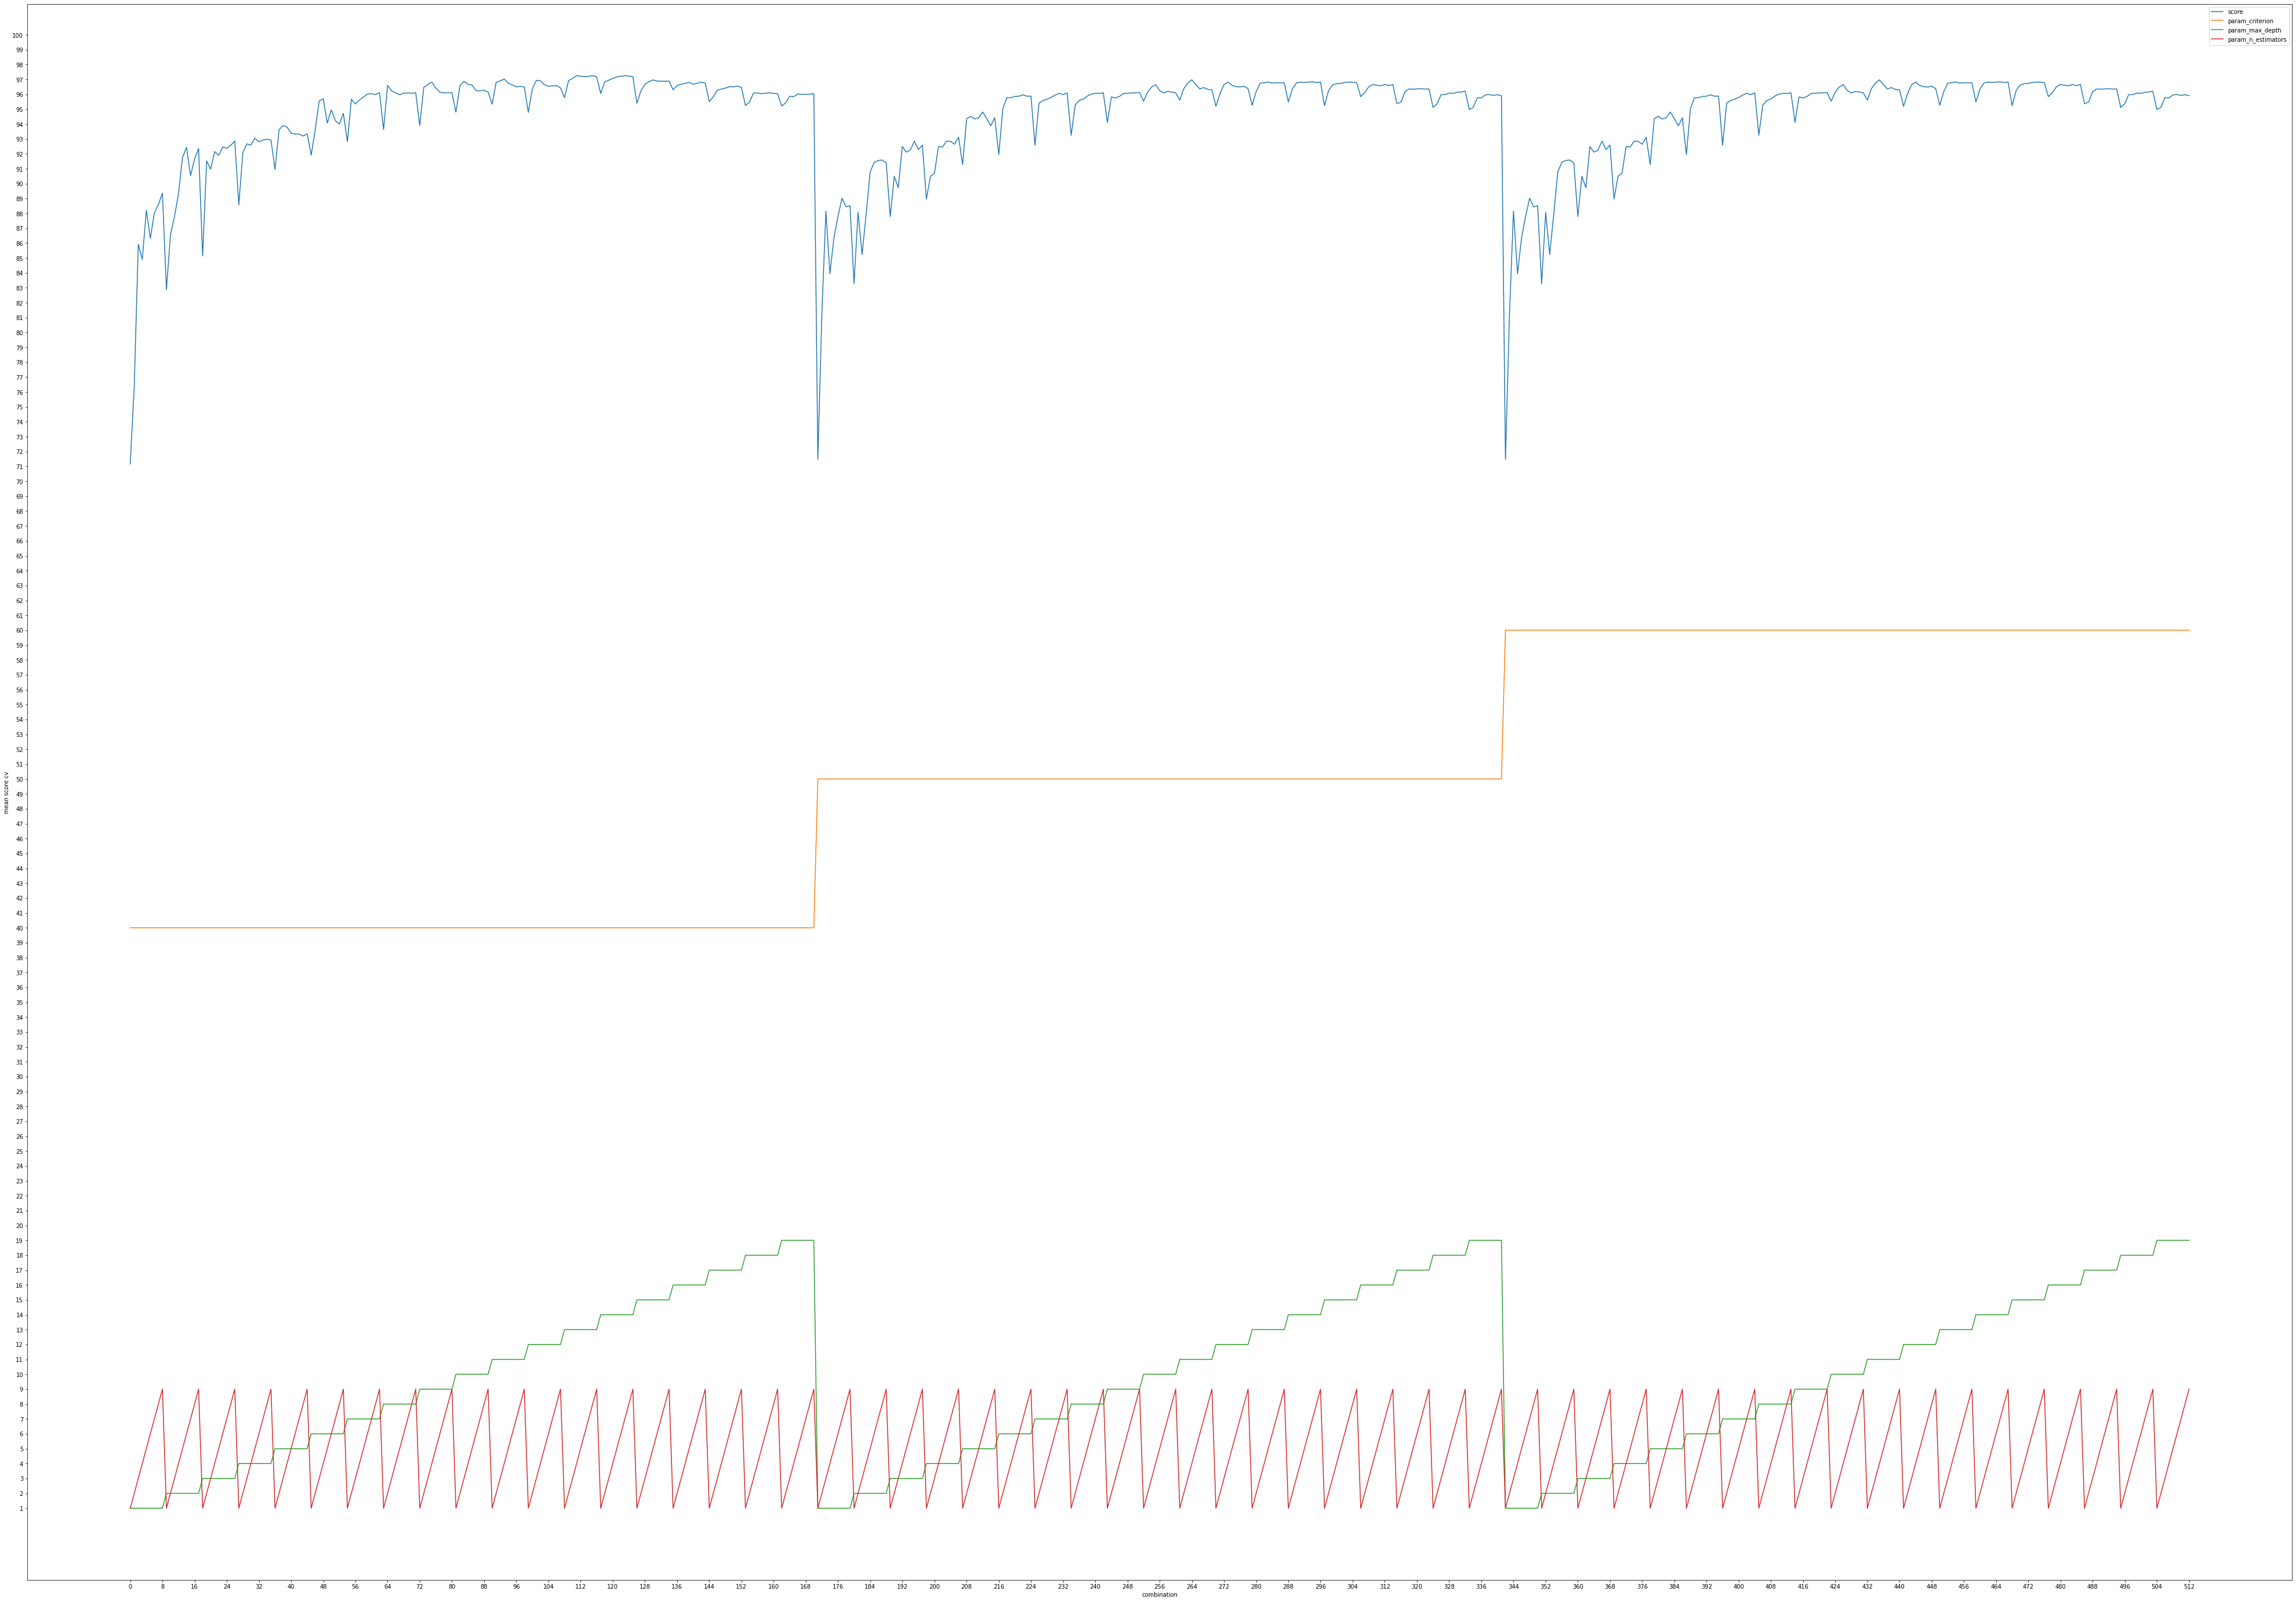

In [ ]:
fig, ax = plt.subplots(figsize=(70,50))



result_score_range = range(len(result_score))
plt.plot(result_score_range,result_score,label='score')



result_param1_range = range(len(result_param1))
# colors = ['r' if x == 0.1 else 'g' if x == 0.2 else 'b' for x in result_param1]
# plt.plot(result_param1_range,result_param1,label='param_criterion', c=colors)
plt.plot(result_param1_range,result_param1,label='param_criterion')





result_param2_range = range(len(result_param2))
plt.plot(result_param2_range,result_param2,label='param_max_depth')





result_param3_range = range(len(result_param3))
plt.plot(result_param3_range,result_param3,label='param_n_estimators')








# plt.title("")
plt.xlabel("combination")
plt.ylabel("mean score cv")

plt.xticks(np.arange(min(result_score_range), max(result_score_range)+1, 8))
plt.yticks(np.arange(1, 101, 1))

plt.legend()
plt.show()

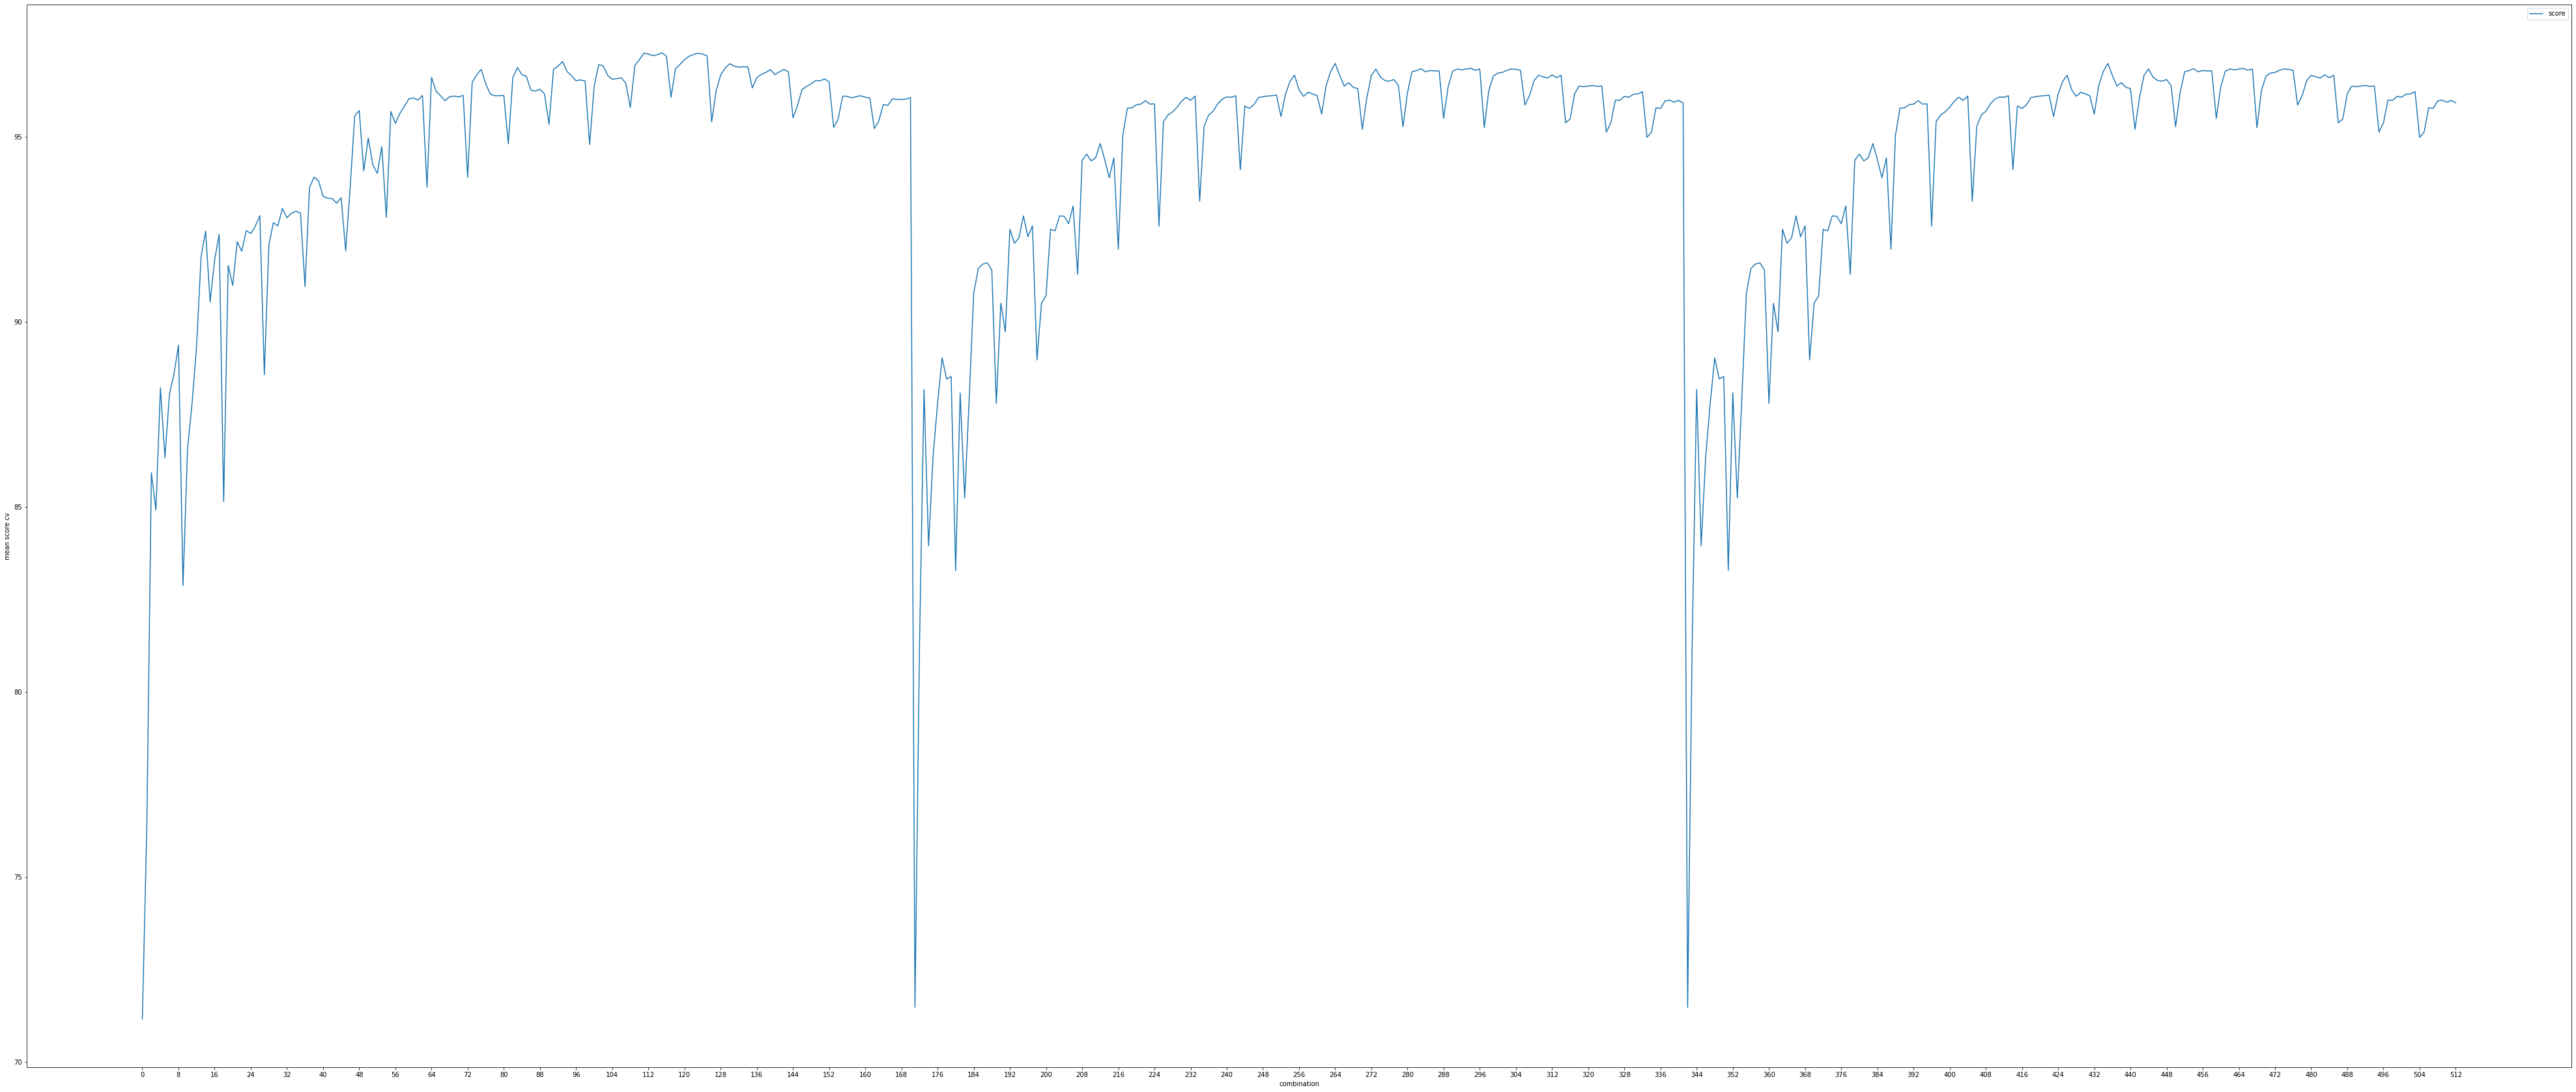

In [ ]:
fig, ax = plt.subplots(figsize=(70,30))


result_score_range = range(len(result_score))
plt.plot(result_score_range,result_score,label='score')






# plt.title("")
plt.xlabel("combination")
plt.ylabel("mean score cv")

plt.xticks(np.arange(min(result_score_range), max(result_score_range)+1, 8))

plt.legend()
plt.show()

In [ ]:
print(f"Best Parameters: {grid_search_rf.best_params_} with best score {grid_search_rf.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 8} with best score 0.972642099941701


In [ ]:
y_pred = grid_search_rf.predict(X_test)
accuracy_score(y_test,y_pred_test)*100

95.84964761158966

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     ALLERGY       0.94      0.99      0.97      2429
        COLD       0.79      0.53      0.63       324
         FLU       0.99      0.98      0.99      2355

    accuracy                           0.96      5108
   macro avg       0.91      0.84      0.86      5108
weighted avg       0.96      0.96      0.96      5108



### DescisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': np.arange(1,20),
    'criterion' : ["gini", "entropy", "log_loss"]
}
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search_dt = GridSearchCV(dt,param_grid,
                                 cv=5, 
                                 verbose=3, 
                                 return_train_score=True)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 57 candidates, totalling 285 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.724, test=0.724) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.723, test=0.732) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.726, test=0.720) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.726, test=0.718) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.725, test=0.723) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.843, test=0.847) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.842, test=0.844) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.845, test=0.841) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.846, test=0.836) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.844, test=0.842) total time=   0.0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True, verbose=3)

In [ ]:
print(f"Best Parameters: {grid_search_dt.best_params_} with best score {grid_search_dt.best_score_}")
# Best Parameters: {'criterion': 'entropy', 'max_depth': 12} with best score 0.9290742020954689

Best Parameters: {'criterion': 'gini', 'max_depth': 11} with best score 0.9761668220364044


In [ ]:
y_pred = grid_search_dt.predict(X_test)
accuracy_score(y_test,y_pred_test)*100

95.84964761158966

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2429
        COLD       0.73      1.00      0.85       324
         FLU       1.00      0.98      0.99      2355

    accuracy                           0.98      5108
   macro avg       0.91      0.98      0.94      5108
weighted avg       0.98      0.98      0.98      5108



### SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
mrange = np.arange(0.01, 0.11, 0.01)
# mrange = np.arange(0.1, 1.1, 0.1)
# mrange = np.arange(1, 11, 1)

In [ ]:
mrange

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [ ]:
param_grid = {
    'C': mrange,
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
}
svc = SVC(random_state=42)


In [ ]:
grid_search_svc = GridSearchCV(svc, param_grid,
                                 cv=5, 
                                 verbose=3, 
                                 return_train_score=True,
                                 n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=3)

In [ ]:
print(f"Best Parameters: {grid_search_svc.best_params_} with best score {grid_search_svc.best_score_}")

Best Parameters: {'C': 0.03, 'kernel': 'linear'} with best score 0.9765024981200732


In [ ]:
y_pred = grid_search_svc.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)
print()
print(classification_report(y_test,y_pred))

95.84964761158966

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2429
        COLD       0.73      1.00      0.85       324
         FLU       1.00      0.98      0.99      2355

    accuracy                           0.98      5108
   macro avg       0.91      0.98      0.94      5108
weighted avg       0.98      0.98      0.98      5108



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
mrange = np.arange(0.1, 1.1, 0.1)
# mrange = np.arange(0.01, 0.11, 0.01)
# mrange = np.arange(1, 11, 1)

In [ ]:
mrange

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
param_grid = {'C': mrange}
log = LogisticRegression(random_state=42)


In [ ]:
grid_search_log = GridSearchCV(log, param_grid,
                                 cv=5, 
                                 verbose=3, 
                                 return_train_score=True)
grid_search_log.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........C=0.1;, score=(train=0.977, test=0.973) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.976, test=0.974) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=0.976, test=0.977) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.977, test=0.976) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.976, test=0.980) total time=   0.0s
[CV 1/5] END .........C=0.2;, score=(train=0.977, test=0.973) total time=   0.0s
[CV 2/5] END .........C=0.2;, score=(train=0.977, test=0.977) total time=   0.0s
[CV 3/5] END .........C=0.2;, score=(train=0.976, test=0.977) total time=   0.0s
[CV 4/5] END .........C=0.2;, score=(train=0.976, test=0.976) total time=   0.0s
[CV 5/5] END .........C=0.2;, score=(train=0.975, test=0.980) total time=   0.0s
[CV 1/5] END C=0.30000000000000004;, score=(train=0.977, test=0.973) total time=   0.0s
[CV 2/5] END C=0.30000000000000004;, scor

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, verbose=3)

In [ ]:
print(f"Best Parameters: {grid_search_log.best_params_} with best score {grid_search_log.best_score_}")
# Best Parameters: {'C': 0.9} with best score 0.9315487791578384

Best Parameters: {'C': 0.2} with best score 0.9765024981200732


In [ ]:
y_pred = grid_search_log.predict(X_test)
accuracy_score(y_test,y_pred_test)*100

95.84964761158966

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2429
        COLD       0.73      1.00      0.85       324
         FLU       1.00      0.98      0.99      2355

    accuracy                           0.98      5108
   macro avg       0.91      0.98      0.94      5108
weighted avg       0.98      0.98      0.98      5108



### Naive bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
mrange = np.arange(0.1, 1.1, 0.1)
# mrange = np.arange(0.01, 0.11, 0.01)
# mrange = np.arange(1, 11, 1)

In [ ]:
C_nb = CategoricalNB()
param_grid = {
    'alpha': mrange
}

In [ ]:
grid_search_C_nb = GridSearchCV(C_nb, param_grid,
                                 cv=5, 
                                 verbose=3, 
                                 return_train_score=True)
grid_search_C_nb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....alpha=0.1;, score=(train=0.977, test=0.973) total time=   0.0s
[CV 2/5] END .....alpha=0.1;, score=(train=0.976, test=0.977) total time=   0.0s
[CV 3/5] END .....alpha=0.1;, score=(train=0.976, test=0.977) total time=   0.0s
[CV 4/5] END .....alpha=0.1;, score=(train=0.977, test=0.976) total time=   0.0s
[CV 5/5] END .....alpha=0.1;, score=(train=0.976, test=0.980) total time=   0.0s
[CV 1/5] END .....alpha=0.2;, score=(train=0.977, test=0.973) total time=   0.0s
[CV 2/5] END .....alpha=0.2;, score=(train=0.976, test=0.977) total time=   0.0s
[CV 3/5] END .....alpha=0.2;, score=(train=0.976, test=0.977) total time=   0.0s
[CV 4/5] END .....alpha=0.2;, score=(train=0.977, test=0.976) total time=   0.0s
[CV 5/5] END .....alpha=0.2;, score=(train=0.976, test=0.980) total time=   0.0s
[CV 1/5] END alpha=0.30000000000000004;, score=(train=0.977, test=0.973) total time=   0.0s
[CV 2/5] END alpha=0.3000000000000000

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, verbose=3)

In [ ]:
print(f"Best Parameters: {grid_search_C_nb.best_params_} with best score {grid_search_C_nb.best_score_}")
# Best Parameters: {'alpha': 0.7000000000000001} with best score 0.9326414222551964

Best Parameters: {'alpha': 0.1} with best score 0.9765024981200732


In [ ]:
y_pred = grid_search_C_nb.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)
print()
print(classification_report(y_test,y_pred))

95.84964761158966

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2429
        COLD       0.73      1.00      0.85       324
         FLU       1.00      0.98      0.99      2355

    accuracy                           0.98      5108
   macro avg       0.91      0.98      0.94      5108
weighted avg       0.98      0.98      0.98      5108



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
mrange = np.arange(1,100,2)
mrange

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': mrange,
}

In [ ]:
grid_search_knn = GridSearchCV(knn, param_grid,
                                 cv=5, 
                                 verbose=3, 
                                 return_train_score=True,
                                 n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             return_train_score=True, verbose=3)

In [ ]:
print(f"Best Parameters: {grid_search_knn.best_params_} with best score {grid_search_knn.best_score_}")

Best Parameters: {'n_neighbors': 23} with best score 0.969537016957363


In [ ]:
y_pred = grid_search_knn.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)
print()
print(classification_report(y_test,y_pred))

95.84964761158966

              precision    recall  f1-score   support

     ALLERGY       0.98      0.98      0.98      2429
        COLD       0.74      0.84      0.79       324
         FLU       1.00      0.98      0.99      2355

    accuracy                           0.97      5108
   macro avg       0.91      0.93      0.92      5108
weighted avg       0.97      0.97      0.97      5108



In [ ]:
pd.DataFrame(grid_search_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014198,0.002037,1.297646,0.027513,1,{'n_neighbors': 1},0.920721,0.923206,0.922367,0.918590,...,0.919520,0.003750,50,0.986991,0.986363,0.986363,0.986258,0.985314,0.986258,0.000539
1,0.021860,0.006952,1.310224,0.104674,3,{'n_neighbors': 3},0.953440,0.950063,0.954259,0.946286,...,0.950570,0.002952,49,0.974927,0.973146,0.971468,0.971048,0.971887,0.972495,0.001404
2,0.025111,0.006296,1.341645,0.040373,5,{'n_neighbors': 5},0.952181,0.959295,0.957197,0.957616,...,0.956362,0.002411,48,0.973668,0.972412,0.971677,0.970314,0.972517,0.972117,0.001104
3,0.017001,0.007565,1.198297,0.296640,7,{'n_neighbors': 7},0.957634,0.962232,0.963911,0.962652,...,0.961900,0.002204,47,0.974507,0.972621,0.973356,0.972097,0.972517,0.973020,0.000847
4,0.020571,0.004800,1.334168,0.323575,9,{'n_neighbors': 9},0.961829,0.965590,0.966429,0.963911,...,0.964166,0.001666,46,0.974087,0.973461,0.972202,0.972517,0.972831,0.973019,0.000677
5,0.016200,0.001833,1.227534,0.129265,11,{'n_neighbors': 11},0.963087,0.966849,0.967268,0.967268,...,0.966432,0.001693,36,0.974192,0.973251,0.972097,0.972831,0.972412,0.972957,0.000730
6,0.020975,0.008283,1.360436,0.285389,13,{'n_neighbors': 13},0.965185,0.964331,0.968107,0.969366,...,0.967019,0.001922,33,0.974297,0.973251,0.972936,0.973775,0.972831,0.973418,0.000549
7,0.020523,0.004923,1.376324,0.193462,15,{'n_neighbors': 15},0.966862,0.968947,0.968527,0.968527,...,0.967942,0.000901,26,0.974717,0.972097,0.972412,0.973880,0.972202,0.973061,0.001049
8,0.018401,0.005006,1.287825,0.185286,17,{'n_neighbors': 17},0.966862,0.968107,0.968107,0.968107,...,0.967858,0.000498,29,0.975346,0.972307,0.972831,0.973461,0.972412,0.973271,0.001114
9,0.016999,0.003295,1.221775,0.247473,19,{'n_neighbors': 19},0.965604,0.966429,0.969366,0.970206,...,0.968110,0.001776,25,0.975556,0.972621,0.973356,0.972726,0.973041,0.973460,0.001079


In [ ]:
acc = grid_search_knn.cv_results_['mean_test_score']
acc

array([0.91951987, 0.95057042, 0.95636155, 0.96190032, 0.96416602,
       0.96643197, 0.96701929, 0.96794235, 0.96785843, 0.96811031,
       0.96878174, 0.96953702, 0.96936927, 0.96920138, 0.96878174,
       0.96869781, 0.96827813, 0.96920134, 0.96945309, 0.96911734,
       0.96886552, 0.96844588, 0.96844603, 0.96861385, 0.96852999,
       0.96869788, 0.96861381, 0.96785867, 0.96869788, 0.96878184,
       0.96878195, 0.96920148, 0.96878188, 0.96861399, 0.96827831,
       0.96785874, 0.96752303, 0.96735514, 0.96718746, 0.96693554,
       0.96676765, 0.96643197, 0.96626411, 0.96550876, 0.96634801,
       0.96567665, 0.96492141, 0.9650053 , 0.96483738, 0.96492127])

In [ ]:
err_rate = 1 - acc
err_rate

array([0.08048013, 0.04942958, 0.04363845, 0.03809968, 0.03583398,
       0.03356803, 0.03298071, 0.03205765, 0.03214157, 0.03188969,
       0.03121826, 0.03046298, 0.03063073, 0.03079862, 0.03121826,
       0.03130219, 0.03172187, 0.03079866, 0.03054691, 0.03088266,
       0.03113448, 0.03155412, 0.03155397, 0.03138615, 0.03147001,
       0.03130212, 0.03138619, 0.03214133, 0.03130212, 0.03121816,
       0.03121805, 0.03079852, 0.03121812, 0.03138601, 0.03172169,
       0.03214126, 0.03247697, 0.03264486, 0.03281254, 0.03306446,
       0.03323235, 0.03356803, 0.03373589, 0.03449124, 0.03365199,
       0.03432335, 0.03507859, 0.0349947 , 0.03516262, 0.03507873])

In [ ]:
error_rate= []
for i in range(1,60,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X,y)
    pred_i = knn.predict(X)

    # error_rate.append(np.mean(pred_i != y))
    # print(i,np.mean(pred_i != y))

    err = 1 - accuracy_score(pred_i,y)
    error_rate.append(err)
    print(err)

0.023378759398496207
0.0575070488721805
0.030838815789473673
0.029957706766917336
0.029076597744360888
0.028254229323308233
0.027784304511278224
0.027314379699248104
0.0267857142857143
0.025845864661654172
0.025023496240601517
0.025023496240601517
0.02484727443609025
0.02508223684210531
0.02514097744360899
0.02555216165413532
0.025375939849624052
0.025610902255639112
0.02578712406015038
0.025845864661654172
0.025904605263157854
0.02608082706766912
0.026374530075187974
0.02631578947368418
0.026609492481203034
0.026844454887218094
0.026668233082706716
0.02655075187969924
0.0267857142857143
0.02702067669172936


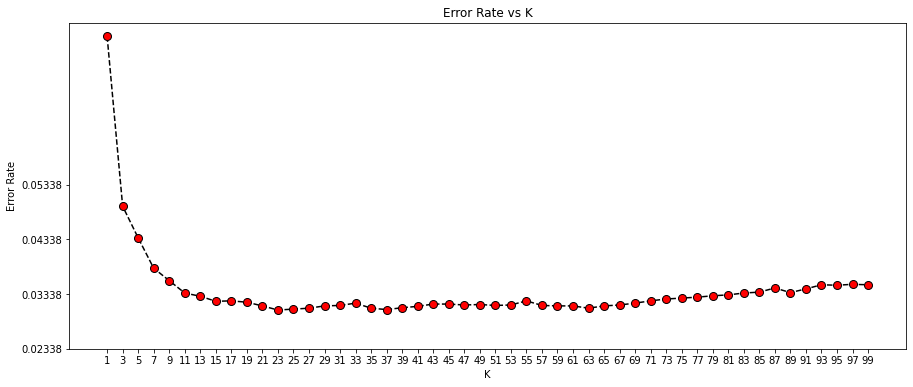

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(range(1,100,2),err_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.yticks(np.arange(min(error_rate), max(error_rate),0.01))
plt.xticks(np.arange(1, 100,2))
plt.show()

## Evaluation

In [ ]:
mdls_val_grid = {}
for clf in (grid_search_dt, grid_search_rf, grid_search_log, 
            grid_search_C_nb, grid_search_knn, grid_search_svc):
            mdls_val_grid[clf.estimator.__class__.__name__] =  clf.best_score_
    

In [ ]:
sorted_mdls_val = dict(sorted(mdls_val_grid.items(), key=lambda x: x[1], reverse=True))
sorted_mdls_val

{'LogisticRegression': 0.9765024981200732,
 'CategoricalNB': 0.9765024981200732,
 'SVC': 0.9765024981200732,
 'DecisionTreeClassifier': 0.9761668220364044,
 'RandomForestClassifier': 0.972642099941701,
 'KNeighborsClassifier': 0.969537016957363}

#### plotting

In [ ]:
mdls = np.array(list(sorted_mdls_val.keys()))
mdls_val = np.array(list(sorted_mdls_val.values()))
print(mdls)
print()
print(mdls_val)

['LogisticRegression' 'CategoricalNB' 'SVC' 'DecisionTreeClassifier'
 'RandomForestClassifier' 'KNeighborsClassifier']

[0.9765025  0.9765025  0.9765025  0.97616682 0.9726421  0.96953702]


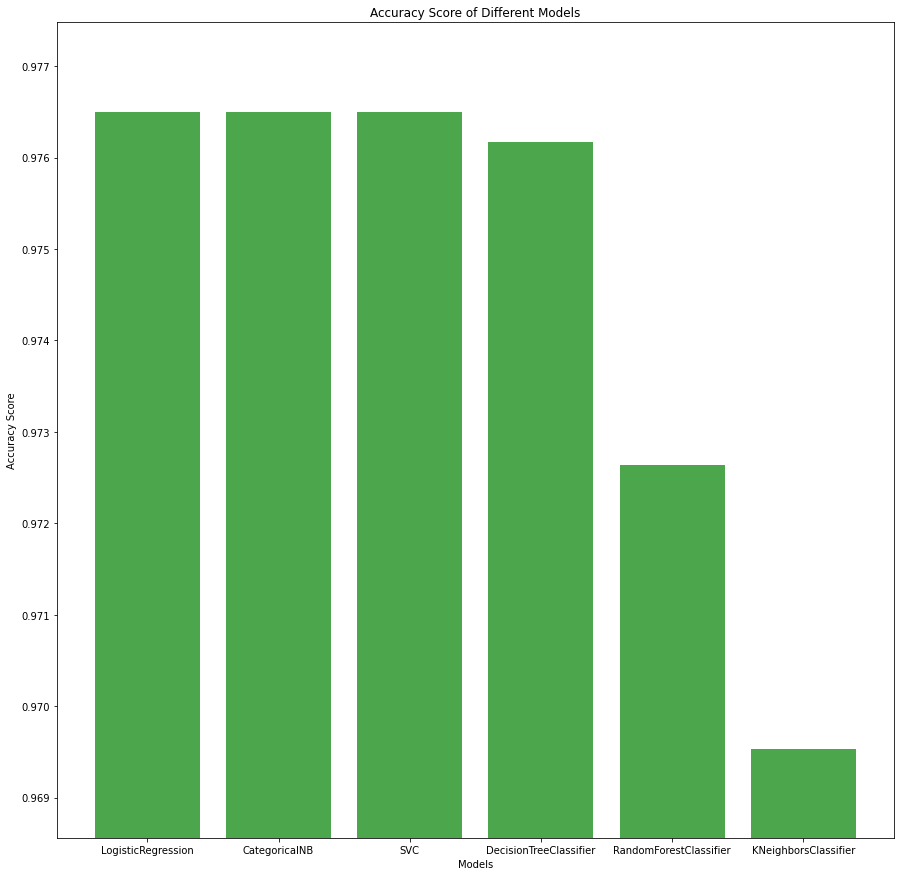

In [ ]:
plt.figure(figsize = (15,15))
plt.bar(mdls, mdls_val, color='green', alpha=0.7)
# plt.bar(sorted_mdls_val.keys(), sorted_mdls_val.values())


plt.title("Accuracy Score of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

# plt.yticks(np.arange(0, 1, 0.02))
plt.ylim(bottom=min(mdls_val) - ((.1/100) * max(mdls_val)) , top=max(mdls_val) + ((.1/100) * max(mdls_val)) )
plt.show()

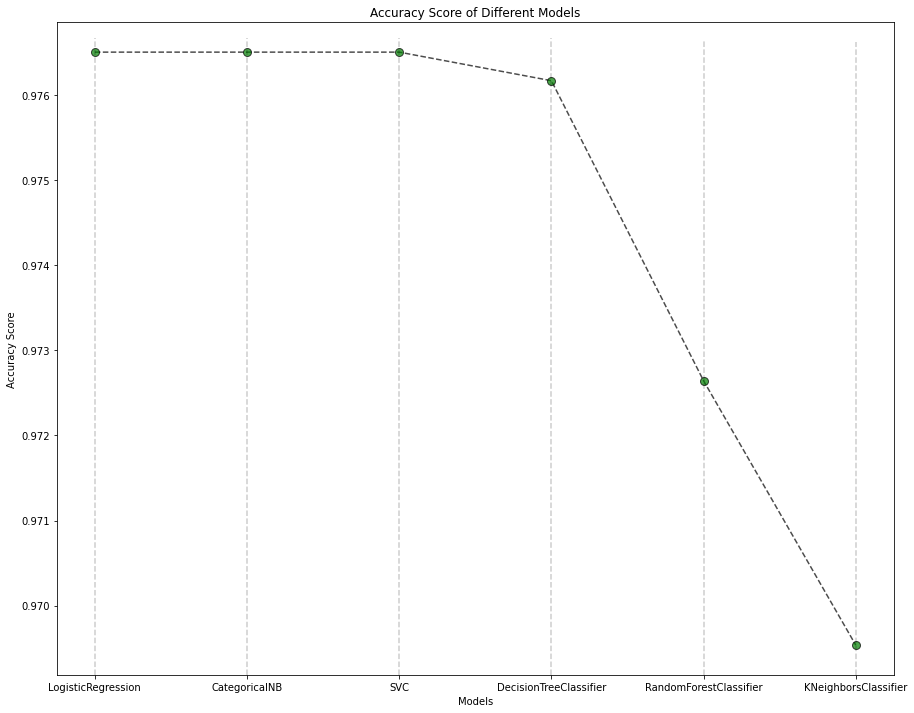

In [ ]:
# plt.bar(mdls, mdls_val)
plt.figure(figsize = (15,12))

plt.plot(
    mdls,
    mdls_val,
    color = 'black',
    linestyle = '--',
    marker = 'o',markerfacecolor='green',
    markersize = 8,
    alpha=0.7,)



for mdl, val in zip(mdls, mdls_val):
    plt.axvline(
        x = mdl, 
        ymin = 0, 
        ymax = val,
        linestyle = '--',
        alpha=0.2,
        color = 'black',)

# for mdl, val in zip(mdls, mdls_val):
#     plt.vlines(
#         x = mdl,
#         ymin = 0,
#         ymax = val,
#         colors = 'green',
#     )


plt.title("Accuracy Score of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

# plt.yticks(np.arange(0, 1, 0.02))
plt.show()

### Model Production

In [ ]:
import pickle

In [ ]:
pickle.dump(grid_search_log, open('log.sav', 'wb'))

In [ ]:
pickle.dump(grid_search_C_nb, open('nb.sav', 'wb'))

In [ ]:
pickle.dump(grid_search_svc, open('svm.sav', 'wb'))

In [ ]:
pickle.dump(grid_search_rf, open('rf.sav', 'wb'))

In [ ]:
pickle.dump(grid_search_knn, open('knn.sav', 'wb'))

In [ ]:
load_mdl = pickle.load(open('svm.sav', 'rb'))

In [ ]:
res = load_mdl.score(X_test, y_test)
res

0.9768989819890368